<a href="https://colab.research.google.com/github/Milan-SANGARE/IA-for-HumanForYou---Groupe-1/blob/master/Livrable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# IA for HumanForYou - Groupe 1

## Projet : Intelligence Artificielle

## Membres
|Auteur|
|---|
|_Youssef RAIES_|CESI Nanterre|2024/03|
|_Milan SANGARE_|
|_Jibril LAMRAOUI_|
|_Killian DEBRAIZE_|
|_Alexandre DE JESUS CORREIA_|

## Contexte
L'entreprise de produits pharmaceutiques "HumanForYou", basée en Inde, emploie environ 4000 personnes. Cependant, chaque année, elle subit un 'turn-over' (c'est-à-dire le taux de renouvellement du personnel dans l'entreprise) d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de 'turn-over' n'est pas bon pour l'entreprise car :
- Les projets sur lesquels étaient les employés quittant la société prennent du retard, ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.
- Un service de ressources humaines de taille conséquente doit être conservé, car il faut avoir les moyens de trouver les nouvelles recrues.
- Du temps est perdu à l'arrivée des nouveaux employés, car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

## Données fournies


Nous disposons de différents datasets (au format CSV), sur un certain nombre de données (anonymisées) concernant les employés :
- **general_data** : les données du service des ressources humaines (âge, genre, niveau d'étude, ...)
- **manager_survey_data** : la dernière évaluation de chaque employé faite pas son manager en février 2015 
- **employee_survey_data** : enquête soumise aux employés en juin 2015 par le service RH pour avoir un retour concernant leur qualité de vie au travail
- **in_time** : horaires d'entrée des employés à leur poste, par date sur une période allant du 1er janvier au 31 décembre 2015
- **out_time** : horaires de sortie des employés à leur poste, par date sur une période allant du 1er janvier au 31 décembre 2015


## Objectif

Nous cherchons à déterminer les facteurs ayant le plus d'influence sur le taux de 'turn-over' et proposer des modèles afin d'avoir des pistes d'amélioration pour donner aux employés l'envie de rester.
Notre variable 'cible' (ou variable 'target') sera la variable `"Attrition"`, correspondant à si l'employé a quitté l'entreprise durant l'année 2016.

## Imports

In [45]:
# bibliothèque import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import et première visualisation des données

In [46]:
DATASET_PATH = "sample_data"
RANDOM_STATE = 42
BOLD = '\033[1m'
END = '\033[0m'

In [47]:
import os
import rarfile
import pandas as pd

def extract_rar(rar_path, extract_path):
    with rarfile.RarFile(rar_path, 'r') as rar_ref:
        rar_ref.extractall(path=extract_path)

rar_path = "/content/data.rar"

extract_path = "/content/datasets/ia_project"

def load_csv_data(csv_path):

    return pd.read_csv(csv_path)

# Extraire les fichiers du .rar
extract_rar(rar_path, extract_path)

general_df = load_data(name="general_data")
manager_srv_df = load_data(name="manager_survey_data")
employee_srv_df = load_data(name="employee_survey_data")
in_time_df = load_data(name="in_time")
out_time_df = load_data(name="out_time")





In [48]:
def check_df(df, name):

    nan_values = df.isna().sum().sum()
    empty_values = df.iloc[:, :].eq('').sum(axis=1).sum()
    total_values = df.count().sum()

    print(f"Dataframe: {name} ")
    print(f"There's {BOLD}{nan_values} ({nan_values * 100 / total_values:.1f}%){END} NaN field(s) and {BOLD}{empty_values} ({empty_values * 100 / total_values:.1f}%){END} empty field(s) out of {BOLD}{total_values}{END} field(s)")
    print(f"The shape of the dataset is {df.shape}\n")

### general_df

In [49]:
check_df(general_df, "general_df")
general_df.head(2)

Dataframe: general_df 
There's 28 (0.0%) NaN field(s) and 0 (0.0%) empty field(s) out of 105812 field(s)
The shape of the dataset is (4410, 24)



,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4


### manager_srv_df

In [50]:
check_df(manager_srv_df, "manager_srv_df")
manager_srv_df.head(2)

Dataframe: manager_srv_df 
There's 0 (0.0%) NaN field(s) and 0 (0.0%) empty field(s) out of 13230 field(s)
The shape of the dataset is (4410, 3)



,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


### employee_srv_df

In [51]:
check_df(employee_srv_df, "employee_srv_df")
employee_srv_df.head(2)

Dataframe: employee_srv_df 
There's 83 (0.5%) NaN field(s) and 0 (0.0%) empty field(s) out of 17557 field(s)
The shape of the dataset is (4410, 4)



,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0


**Conclusion**:
On remarque un faible quantité de valeurs "NaN" présentes dans les données. Bien qu'elles soient très peu nombreuses, nous verrons par la suite ce que nous en ferons.

### in_time_df

In [52]:
check_df(in_time_df, "in_time_df")
in_time_df.head(2)

Dataframe: in_time_df 
There's 109080 (10.4%) NaN field(s) and 0 (0.0%) empty field(s) out of 1046340 field(s)
The shape of the dataset is (4410, 262)



,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20


### out_time_df

In [53]:
check_df(out_time_df, "out_time_df")
out_time_df.head(2)

Dataframe: out_time_df 
There's 109080 (10.4%) NaN field(s) and 0 (0.0%) empty field(s) out of 1046340 field(s)
The shape of the dataset is (4410, 262)



,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58


**Conclusion**:
On remarque également un grand nombre de 'features': il serait utile de les réduire avant de joindre ce dataset aux autres. 
De plus, on remarque aussi la présence de valeurs "NaN", cela doit correspondre aux jours où l'employé n'a pas badgé, et a donc été absent.

### Conclusion de l'Analyse visuelle des données
Au global, les données semblent bonnes. Nous allons rassembler les différents datasets sur l'*EmployeeID*, il sera ainsi facile de diviser le dataframe en deux (sets d'entraînement et de test).
Toutefois, il est nécessaire de renommer la première colonne de 'in_time_df' et 'out_time_df', qui ne sont pas nommées mais correspondent à l'*EmployeeID*. Les dataframes 'in_time' et 'out_time' sont importants (262 colonnes chacun), nous allons donc effectuer un traitement avant de les joindre au dataframe principal.
Par la suite, notre dataframe principal sera "*`hr_df`*".

### Refactorisation de in_time et out_time pour l'étude
#### EmployeeID

In [54]:
def rename_first_col(df, name):
    arr = df.columns.tolist()
    arr[0] = name
    df.columns = arr
    return df

final_time_df = pd.DataFrame()
final_time_df["EmployeeID"] = general_df["EmployeeID"]

out_time_df = rename_first_col(out_time_df, 'EmployeeID')
in_time_df = rename_first_col(in_time_df, 'EmployeeID')

#### Vérification des données (shape, structure, intégrité)
Nous allons rapidement vérifier la structure globale, l'intégrité, et les types de notre dataframe.

In [55]:
check_df(out_time_df, "Out Time")
check_df(in_time_df, "In Time")
print("\n\n", out_time_df.info())
out_time_df.head(3)

Dataframe: Out Time 
There's 109080 (10.4%) NaN field(s) and 0 (0.0%) empty field(s) out of 1046340 field(s)
The shape of the dataset is (4410, 262)

Dataframe: In Time 
There's 109080 (10.4%) NaN field(s) and 0 (0.0%) empty field(s) out of 1046340 field(s)
The shape of the dataset is (4410, 262)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


 None


,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50


Les valeurs "NaN" semblent représenter les absences de l'employé, elles ne doivent donc pas être remplacées : elles peuvent être utilisées afin de créer une nouvelle métrique.
On remarque également que les employés sont tous absents certains jours (ex: 1er Janvier). Si personne ne travaille pendant un jour (jour férié,...), nous pouvons supprimer ce jour du dataset.


#### Feature Engineering

On peut voir différentes possibilités permettant de réduire et d'utiliser les données de ces deux dataframes.
- **meanPresenceTime**: nombre d'heures de présence par jour en moyenne
- **meanStartTime**: heure d'arrivée moyenne (début du travail)
- **meanLeaveTime**: heure de départ moyenne (fin du travail)
- **numberOfAbsenceDay**: nombre de jours d'absence
- **numberOfPresenceDay**: nombre de jours de présence

Afin de réaliser ces features, il est nécessaire de convertir les dates au bon format de données. En effet, celles-ci sont actuellement des chaînes de caractères.

##### Conversion

In [56]:
in_time_df.iloc[:, 1:] = in_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce') # coerce va remplacer les erreurs par NaN ou NaT
out_time_df.iloc[:, 1:] = out_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce') # coerce va remplacer les erreurs par NaN ou NaT

out_time_df.info()

<ipython-input-56-2b1d604d67f7>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  in_time_df.iloc[:, 1:] = in_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce') # coerce va remplacer les erreurs par NaN ou NaT
<ipython-input-56-2b1d604d67f7>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  out_time_df.iloc[:, 1:] = out_time_df.iloc[:, 1:].apply(pd.to_datetime, errors='coerce') # coerce va remplacer les erreurs par NaN ou NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, EmployeeID to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


##### MeanStartTime & MeanLeaveTime

In [57]:
import pandas as pd

# Example conversion, replace with actual conversion as needed
def convert_to_datetime(x):
    # Assuming x is a string format that pd.to_datetime can handle, else adjust accordingly
    return pd.to_datetime(x, errors='coerce')  # 'coerce' will turn unparseable strings into NaT

def to_hour(x):
    return x.dt.hour + (x.dt.minute / 60)

# Apply conversion before applying to_hour
in_hour_df = in_time_df.iloc[:, 1:].applymap(convert_to_datetime).apply(lambda x: to_hour(x))
out_hour_df = out_time_df.iloc[:, 1:].applymap(convert_to_datetime).apply(lambda x: to_hour(x))

final_time_df["meanStartTime"] = in_hour_df.mean(axis=1)
final_time_df["meanLeaveTime"] = out_hour_df.mean(axis=1)


##### MeanPresenceTime

In [58]:
def to_hour_td(x):
        # Check if the value is a NaT or NaN and return NaN to handle missing values gracefully
        if pd.isna(x):
            return np.nan
        else:
            # Assuming x is a timedelta object, extract hours and minutes
            return x.components.hours + (x.components.minutes / 60)

processed_df = out_time_df.copy()  # Create a copy to retain original structure
for col in processed_df.columns[1:]:  # Assuming first column is 'EmployeeID' and should not be processed
    processed_df[col] = out_time_df[col] - in_time_df[col]

# Now `processed_df` is defined and contains timedelta objects representing durations

# Step 3: Apply the to_hour_td function to calculate hours and minutes from timedelta
mean_presence_time_df = processed_df.iloc[:, 1:].applymap(to_hour_td)

# Step 4: Calculate the mean and assign it to the final DataFrame
final_time_df["meanPresenceTime"] = mean_presence_time_df.mean(axis=1)

##### NumberOfAbsenceDay & NumberOfPresenceDay

In [59]:
dropped_processed_df = processed_df.dropna(axis=1, how='all')
final_time_df["numberOfAbsenceDay"] = dropped_processed_df.iloc[:, 1:].isna().sum(axis=1)
final_time_df["numberOfPresenceDay"] = dropped_processed_df.iloc[:, 1:].notna().sum(axis=1)


In [60]:
final_time_df.head(3)

,EmployeeID,meanStartTime,meanLeaveTime,meanPresenceTime,numberOfAbsenceDay,numberOfPresenceDay
0,1,9.993032,17.367170,7.365589,17,232
1,2,9.980720,17.698446,7.710946,13,236
2,3,10.016598,17.030096,7.004890,7,242


### Fusion des Dataframes

In [61]:
def merge_dfs(initial_df, dfs, merge_value):
    merged_df = initial_df
    for df in dfs: merged_df = pd.merge(merged_df, df, on=merge_value)
    return merged_df

hr_df = merge_dfs(initial_df=general_df, dfs=[manager_srv_df, employee_srv_df, final_time_df], merge_value="EmployeeID")

### Remplacement des "NA" par "NaN"
Lorsqu'un employé n'a pas répondu à une question du questionnaire, le texte "NA" apparaît à la place de la note, nous allons donc remplacer ce texte par "NaN".

In [62]:
hr_df = hr_df.replace(to_replace="NA", value=np.nan)

### Conclusion
Nous avons maintenant un dataset prêt à être exploré et analysé. On remarque différents types de variables (discrètes et continues). 
Nous pourrions déjà imaginer à encoder les variables discrètes, afin de les utiliser avec notre modèle.

Nous avons donc:

|Variables Continues/Quantitatives|Variables Discrètes/Qualitatives|
|---|---|
|Age|BusinessTravel|
|DistanceFromHome|Department|
|MonthlyIncome|EducationField|
|EmployeeCount|Education|
|EmployeeID|Gender|
|NumCompaniesWorked|JobLevel|
|PercentSalaryHike|JobRole|
|StandardHours|JobInvolvement|
|TotalWorkingYears|MaritalStatus|
|TrainingTimesLastYear|Over18|
|YearsAtCompany|StockOptionLevel|
|YearsSinceLastPromotion|PerformanceRating|
|YearsWithCurrManager|EnvironmentSatisfaction|
|meanStartTime|JobSatisfaction|
|meanLeaveTime|WorkLifeBalance|
|meanPresenceTime||
|numberOfAbsenceDay||
|numberOfPresenceDay||

On y reviendra plus tard, mais on peut déjà remarquer variables sensibles ou inutiles : 
- **EmployeeCount**, **StandardHours**, **Over18** : ces features ne possèdent qu'une seule variable, nous ne pouvons pas en tirer des informations 
- **EmployeeID** : cette feature ne possède pas d'informations, elle était utilisé pour effectuer le 'merge' entre les différentes databases
- **Age**, **Gender**, **MaritalStatus** : ces features sont potentiellement sensibles, il faudra déterminer si nous souhaitons les garder


## Exploratory Data Analysis

### Objectif
- Comprendre du mieux possible nos données 
- Développer une première stratégie de modélisation

Nous allons garder le dataset complet durant cette partie. Nous pouvons analyser statistiquement les variables numériques à l'aide de "describe".

### Checklist de base

**Analyse de la forme:**
- Variable 'target' : Attrition
- Lignes et colonnes : 4410, 30
- Types de variables : 
    - continues : 15 
    - discrètes : 14
- Analyse des valeurs manquantes :
    - très peu de NaN (<0.1%)

**Analyse du fond:**

- **Visualisation de la 'target' :**
    - 16% de turnover (711 / 4410)
- **Signification des variables :**
    - On possède de nombreuses variables discrètes (prenant des valeurs allant de 1 à 5). 
        - 1 est la valeur la plus basse, ou la moins bonne 
        - 5 est la valeur la plus haute, ou la meilleure
    - Pour la feature 'MaritalStatus', la valeur 'Divorced' signifie que la personne a deja été mariée mais qu'elle est maintenant 'Single'.
- **Relation Variables / Target**:
    - Décrite après les graphiques liés.

### Analyse plus détaillée

**Hypothèse nulle (Ho):**
- Les jeunes (<35ans) ayant travaillé dans le domaine des ressources humaines sont plus susceptibles de partir.
    - H0 = Les jeunes ont un taux de turnover EGAL aux autres personnes plus agées.
        - **Rejetée** comme l'a montré notre T-TEST et notre analyse visuelle.
- Les personnes travaillant aux ressources humaines sont plus susceptibles de partir.
    - H0 = Les employés travaillant dans le domaine des ressources humaines ont un taux de turnover EGAL aux autres employés des autres domaines.
        - **Rejetée** comme l'a montré notre T-TEST et notre analyse visuelle. Toutefois, les résultats sont à prendre avec des pincettes, il n'y a que 198 personnes faisant partie de ce département.
- Les personnes travaillant plus sont plus susceptibles de partir.
    - H0 = Les personnes faisant des heures supplémentaires ont tout autant de risque de partir que les personnes n'en faisant pas.
        - **Rejetée** comme l'a montré notre T-TEST (*meanPresenceTime*) et notre analyse visuelle.

### Vérification du dataframe


In [63]:
analysis_df = hr_df.copy()

check_df(analysis_df, 'analysis_df')
print(analysis_df.nunique())
analysis_df

Dataframe: analysis_df 
There's 111 (0.1%) NaN field(s) and 0 (0.0%) empty field(s) out of 149829 field(s)
The shape of the dataset is (4410, 34)

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfacti

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,meanStartTime,meanLeaveTime,meanPresenceTime,numberOfAbsenceDay,numberOfPresenceDay
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,3,3,3.0,4.0,2.0,9.993032,17.367170,7.365589,17,232
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,2,4,3.0,2.0,4.0,9.980720,17.698446,7.710946,13,236
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,3,3,2.0,2.0,1.0,10.016598,17.030096,7.004890,7,242
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,2,3,4.0,4.0,3.0,9.973830,17.167305,7.185248,14,235
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,3,3,4.0,1.0,3.0,9.990068,17.996327,7.998163,4,245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3,3,4.0,1.0,3.0,10.011317,18.533539,8.513855,6,243
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,4.0,4.0,3.0,9.996196,16.089281,6.084371,8,241
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,3,4,1.0,3.0,3.0,9.971501,17.678427,7.698124,18,231
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,2,3,4.0,1.0,3.0,10.010650,19.502974,9.484440,8,241



### Nettoyage des données inutiles
Nous allons commencer par enlever les champs ne comportant qu'une seule valeur ou ceux liés a un ID.

In [64]:
analysis_df = analysis_df.drop(['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

### Séparation des variables discrètes et continues 

In [65]:
cont = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','meanStartTime','meanLeaveTime','meanPresenceTime','numberOfAbsenceDay', 'numberOfPresenceDay']

disc = ['EducationField', 'BusinessTravel', 'Department', 'Education', 'JobLevel', 'JobRole', 'JobInvolvement', 'StockOptionLevel', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Gender', 'MaritalStatus']

In [66]:
print(f"shape: {analysis_df.shape} (avec Attrition)")
print(f"nombre de variables continues: {len(cont)}, nombre de variables discretes: {len(disc)} (sans Attrition)")
analysis_df.describe()

shape: (4410, 30) (avec Attrition)
nombre de variables continues: 15, nombre de variables discretes: 14 (sans Attrition)


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,meanStartTime,meanLeaveTime,meanPresenceTime,numberOfAbsenceDay,numberOfPresenceDay
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,...,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,...,2.729932,3.153741,2.723603,2.728246,2.761436,9.991773,17.692558,7.692603,12.734694,236.265306
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,...,0.711400,0.360742,1.092756,1.101253,0.706245,0.018147,1.340417,1.340213,5.503779,5.503779
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,9.929079,15.942330,5.942070,1.000000,225.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,...,2.000000,3.000000,2.000000,2.000000,2.000000,9.979616,16.656231,6.665046,8.000000,232.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,9.991957,17.400237,7.398591,13.000000,236.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,...,3.000000,3.000000,4.000000,4.000000,3.000000,10.003581,18.352469,8.360342,17.000000,241.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,10.069684,21.058616,11.022792,24.000000,248.000000


Selon la feature '*StandHours*', on remarque que tous les employés devraient travailler 8H par jour. 
Or, en comparant avec le '*meanPresenceTime*' crée précédemment, nous remarquons une différence : 
en effet, on observe que les employés travaillent entre 6 et 11 heures par jour, il serait intéressant de regarder de plus près les ~25% de personnes travaillant le plus.
Il pourrait également exister une relation entre le '*StockOptionLevel*' et le '*JobLevel*'.
De plus, une métrique intéressante serait de rajouter combien la montée en salaire de l'année précédente a rapporté à l'employé.



Nous allons tout d'abord vérifier la distribution de l'attrition.


### Vérification de la distribution de l'attrition

nous souhaitons vérifier la distribution de notre variable target

On a un taux de turnover de 16.12% soit 711/4410 valeurs


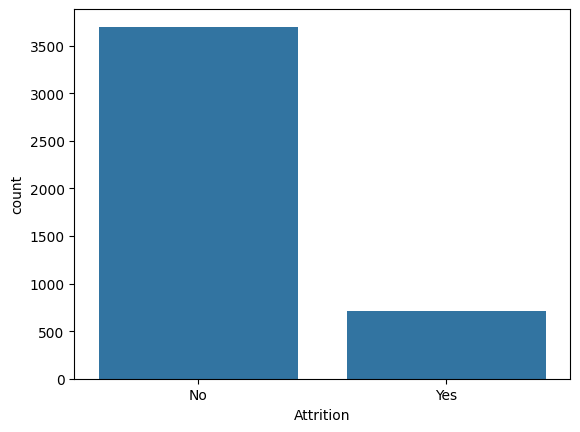

<Axes: xlabel='Attrition', ylabel='Age'>

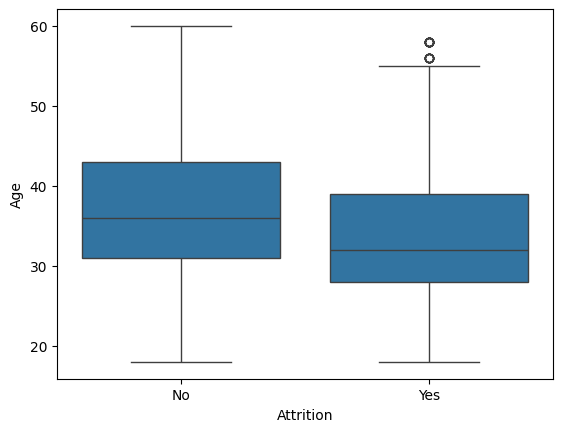

In [67]:
percentage = ((analysis_df['Attrition'] == 'Yes').sum() / analysis_df['Attrition'].shape[0]) * 100
total = analysis_df['Attrition'].shape[0]
yes = (analysis_df['Attrition'] == 'Yes').sum()


print(f"On a un taux de turnover de {percentage:.2f}% soit {yes}/{total} valeurs")

sns.countplot(x='Attrition', data=analysis_df)
plt.show()
sns.boxplot(x='Attrition', y='Age', data=analysis_df)

**Conclusion**:
On remarque que l'on a environ 16% de turnover, les personnes partant de l'entreprise sont en moyenne plus jeunes que celles restant.


### Vérification de la relation entre l'attrition et les valeurs discrètes
#### Calcul des intervalles de prédiction

L'intervalle de fluctuation (prediction interval en anglais) permet de détecter un écard important par rapport aux proportions thérotiques d'un jeu de données.

Par exemple, dans notre entreprise, il y a un ratio de 60% d'hommes et de 40% de femmes. Cependant la proportion hommes/femmes parmis les personnes qui partent est différente (62% / 38%). Cette différence de 2 pourcents est-elle anormalement élevée ? L'intervalle de fluctuation permet de répondre à cette question.

L'intervalle est calculé par la formule suivante :
$$
\left[p-1,96 \sqrt{\frac{p(1-p)}{n}}\ ;\ p+1,96\sqrt{\frac{p(1-p)}{n}}\,\right]
$$

$p$ est la proportion visée d'une classe et $n$ le nombre total de personnes dans le différentes classes. Dans l'exemple précedent, $p=0.6$, la proportion d'homme dans l'entreprise, et $n=711$, le nombre d'hommes et de femmes parmis les personnes qui partent.

L'intervalle calculé vaut $\left[0.564\ ;\ 0.636\,\right]$. On remarque que la proportion d'homme qui partent est dans cette intervalle $0.564 \lt 0.62 \lt 0.636$, donc rien d'anormal. Si la valeur avait été plus basse que la borne inférieure de l'intervalle, moins d'hommes que la normale partirait de l'entreprise et inversement si la valeur avait été plus haute que la borne supérieur.

Cette méthode est un calcul simplifié. Pour savoir si les valeur de $p$ et de $n$ peuvent être utilisées, il faut d'abord vérifier que $np \geq 5$ et que $n(1-p) \geq 5$.

In [68]:
def prediction_intervals(attrition: pd.DataFrame) -> pd.DataFrame:
    # Getting totals.
    n_yes = attrition.iloc[-1]['Yes']
    n_total = attrition.iloc[-1]['Total']

    # Adding percentages.
    attrition = attrition.assign(
        P_Total=lambda x: round(x.Total / n_total, 3),
        P_Yes=lambda x: round(x.Yes / n_yes, 3)
    )

    # Calculating intervals
    intervals = attrition.drop(attrition.tail(1).index).drop(['No', 'Yes', 'Total'], axis=1)
    intervals = intervals.assign(
        Lower=lambda x: round(x.P_Total - 1.96 * np.sqrt(x.P_Total * (1 - x.P_Total) / n_yes), 3),
        Upper=lambda x: round(x.P_Total + 1.96 * np.sqrt(x.P_Total * (1 - x.P_Total) / n_yes), 3)
    )

    # Estimate the predicate
    for i, row in intervals.iterrows():
        if row.P_Yes < row.Lower:
            intervals.at[i, 'Predicate'] = -1
            intervals.at[i, 'Difference'] = round(row.Lower - row.P_Yes, 3)
        elif row.P_Yes > row.Upper:
            intervals.at[i, 'Predicate'] = 1
            intervals.at[i, 'Difference'] = round(row.P_Yes - row.Lower, 3)
        else:
            intervals.at[i, 'Predicate'] = 0
            intervals.at[i, 'Difference'] = pd.NA
    return intervals

In [69]:
for name in disc:
    attrition = pd.crosstab(analysis_df[name],
                            analysis_df['Attrition'],
                            margins=True, margins_name="Total")
    print(f"----- {name} -----")
    print(prediction_intervals(attrition))

----- EducationField -----
Attrition         P_Total  P_Yes  Lower  Upper  Predicate  Difference
EducationField                                                       
Human Resources     0.018  0.046  0.008  0.028        1.0       0.038
Life Sciences       0.412  0.426  0.376  0.448        0.0         NaN
Marketing           0.108  0.105  0.085  0.131        0.0         NaN
Medical             0.316  0.316  0.282  0.350        0.0         NaN
Other               0.056  0.042  0.039  0.073        0.0         NaN
Technical Degree    0.090  0.063  0.069  0.111       -1.0       0.006
----- BusinessTravel -----
Attrition          P_Total  P_Yes  Lower  Upper  Predicate  Difference
BusinessTravel                                                        
Non-Travel           0.102  0.051  0.080  0.124       -1.0       0.029
Travel_Frequently    0.188  0.291  0.159  0.217        1.0       0.132
Travel_Rarely        0.710  0.658  0.677  0.743       -1.0       0.019
----- Department -----
Attritio

**Conclusion**
- *EducationField*
=> Nous pourrions créer une nouvelle variable regroupant les catégories étant dans un intervalle normal (Life Sciences, Marketing, Medical, Other) et gardant les autres séparées.
- *BusinessTravel*
=> Cette feature est importante.
- *Department*
=> Les valeurs autres que HumanResources n'étant pas significatives, nous pourrions créer une nouvelle feature *isInHumanResources*.
- *Education*
=> Les valeurs autres que 2 n'étant pas significatives, nous pourrions créer une nouvelle feature *EducationIs2*.
- *JobLevel*
=> Les valeurs autres que 2 n'étant pas significatives, nous pourrions créer une nouvelle feature *JobLevelIs2*.
- *JobRole*
=> Les valeurs autres que Manufacturing Director et Research Director n'étant pas significatives, nous pourrions les grouper.
- *JobInvolvement*
=> Les valeurs autres que 1 n'étant pas significatives, nous pourrions créer une nouvelle feature *JobInvolvementIs1*.
- *StockOptionLevel*
=> Celle-ci ne semble pas importante.
- *PerformanceRating*
=> Celle-ci ne semble pas importante.
- *EnvironmentSatisfaction*
=> Nous pouvons garder celle-ci, toutes les variables semblent avoir leur importance.
- *JobSatisfaction*
=> Les valeurs autres que 1 et 4 n'étant pas significatives, nous pourrions les grouper.
- *WorkLifeBalance*
=> Les différences étant petites, nous pourrions créer une catégorie groupant 2 et 4 mais cela pourrait ne pas être pertinent.
- *Gender*
=> Celle-ci ne semble pas importante.
- *MaritalStatus*
=> Celle-ci semble importante.


#### Vérification par la visualisation

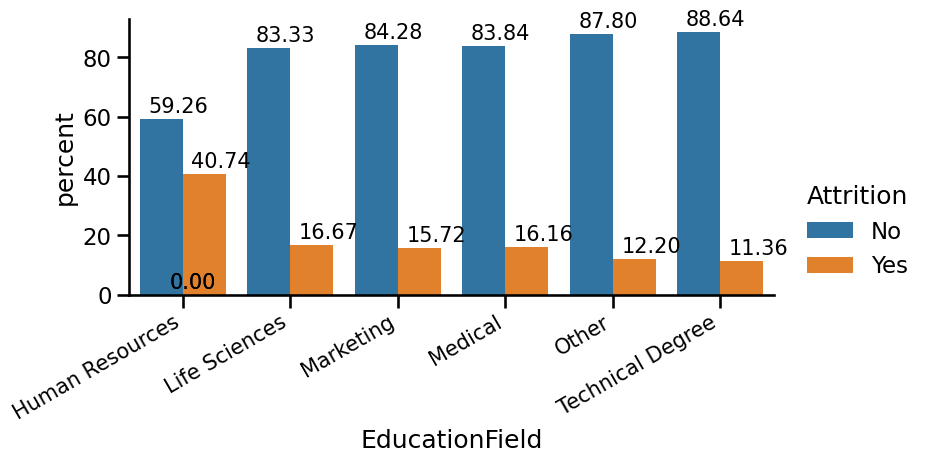

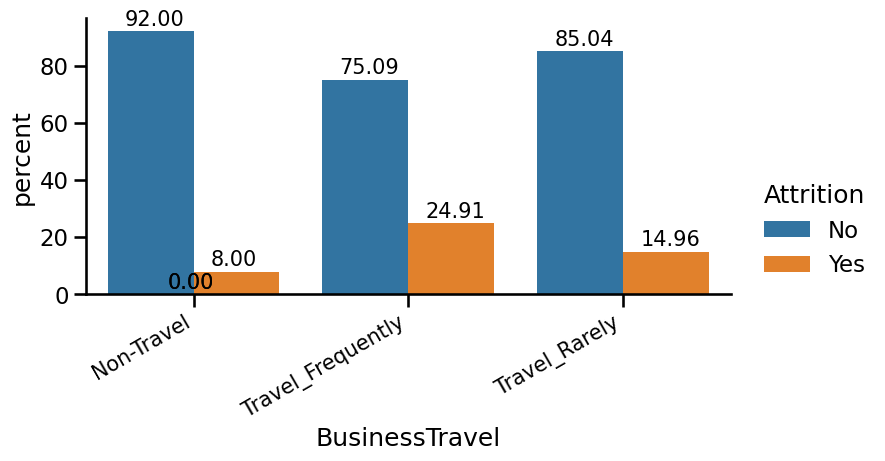

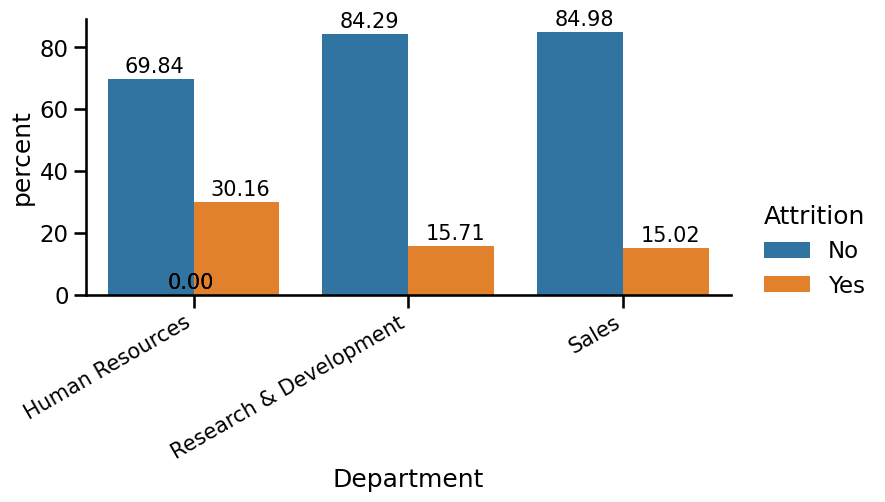

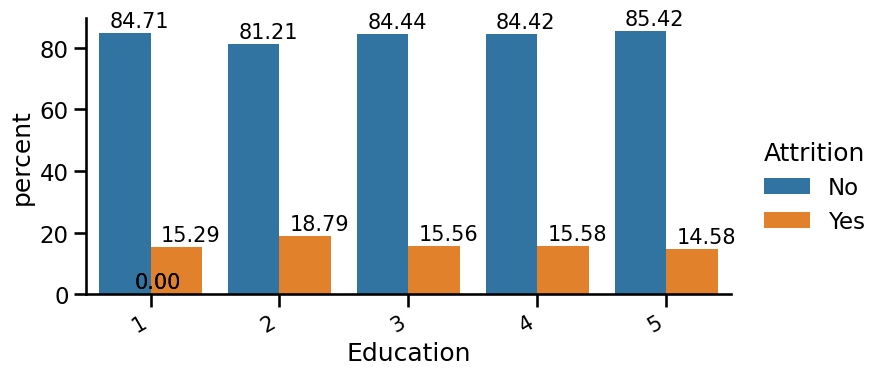

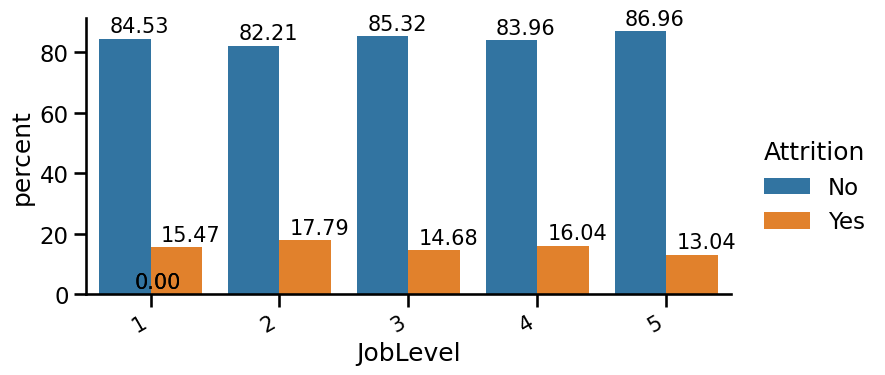

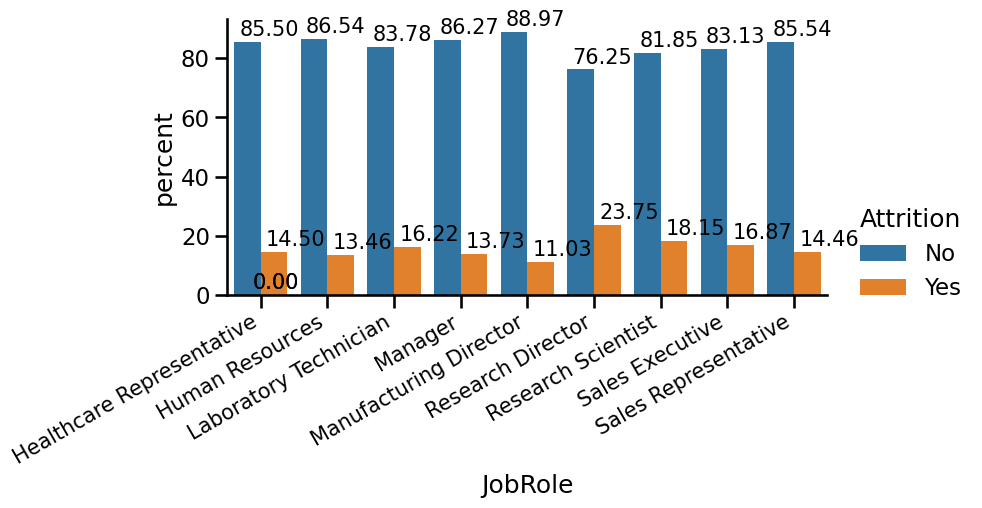

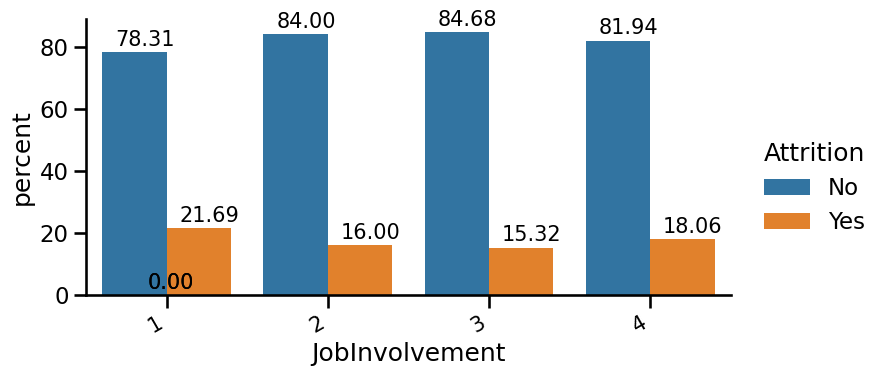

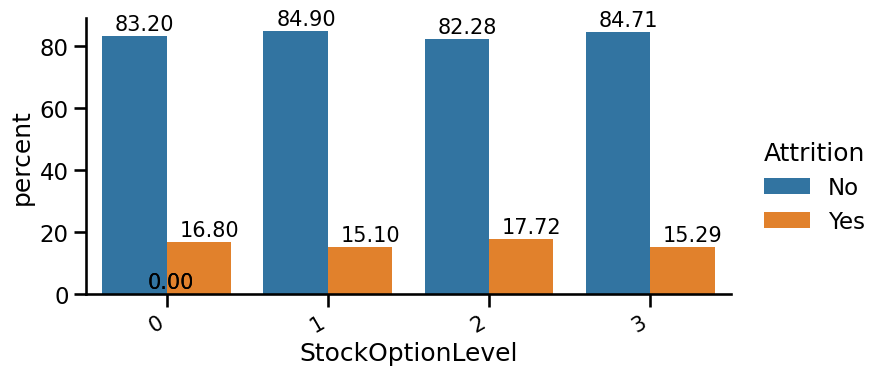

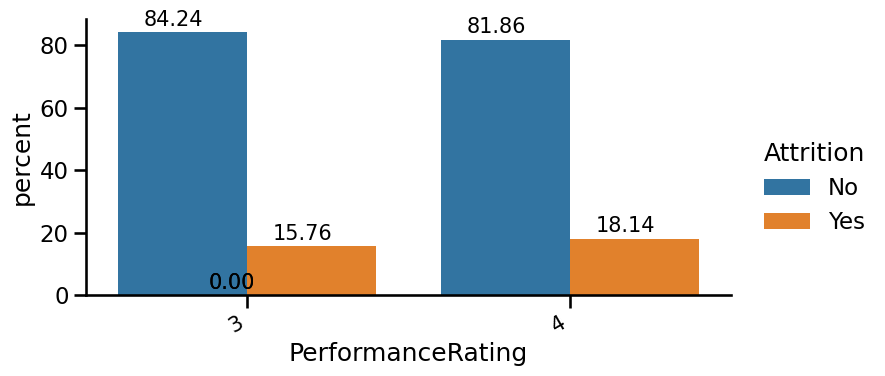

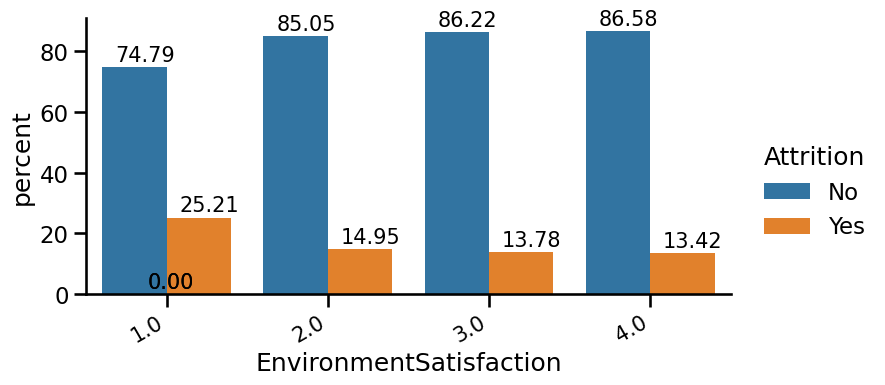

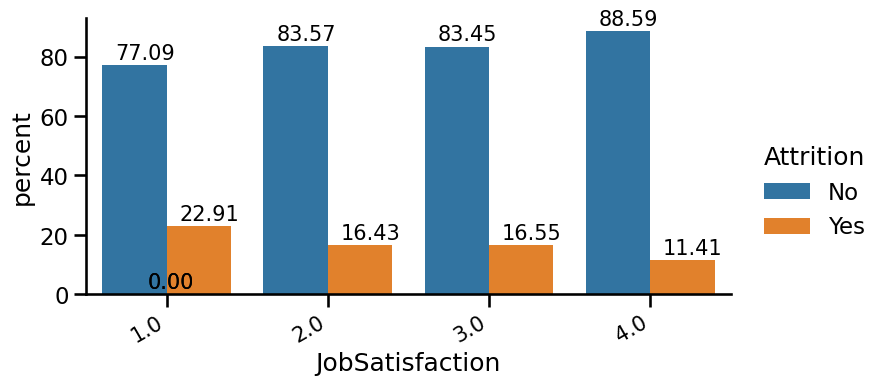

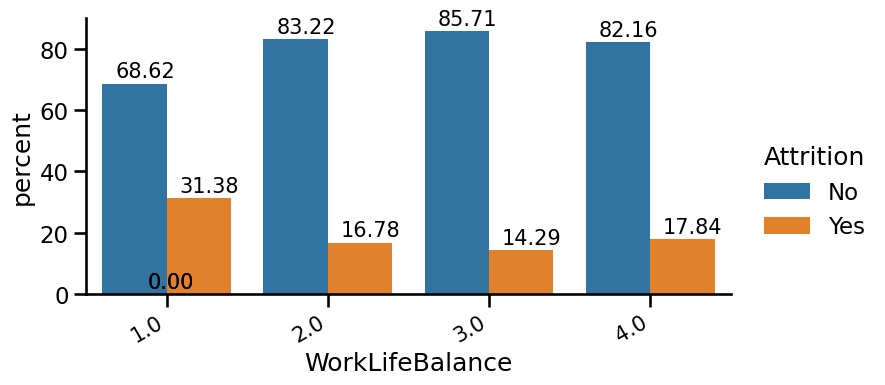

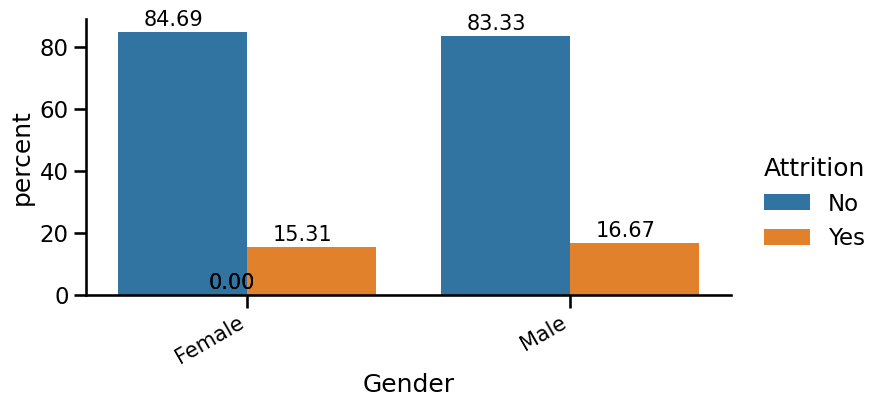

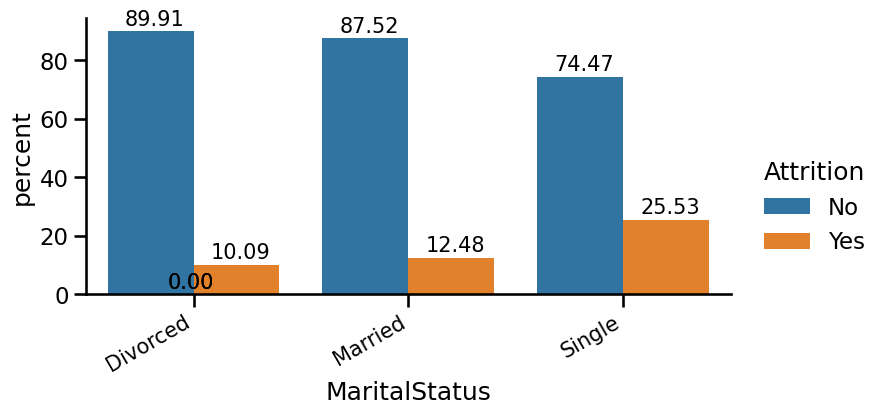

In [70]:
def add_annotation(cat, c):
    x1 = c.get_x() + c.get_width() / 2 - .12
    y1 = c.get_y() + c.get_height() + 2

    cat.ax.annotate(format(c.get_height(), ".2f"), (x1, y1), size=15)

def plot_hist(column, df, annot=True):

    x_name = column
    y_name = 'Attrition'

    temp_data = (df
     .groupby(x_name)[y_name]
     .value_counts(normalize=True)
     .mul(100)
     .rename('percent')
     .reset_index())

    sns.set_context('talk', font_scale = 1)
    catp = sns.catplot(data=temp_data, x=x_name, y='percent', hue='Attrition', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)

    catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)



    if annot:
        spots = catp.ax.patches
        # need to separate in half de spots to put them in the right order (first half: Attrition=no; second half Attrition=yes)
        mid = len(spots) // 2

        for i in range(0, mid) :

            add_annotation(catp, spots[i])
            add_annotation(catp, spots[mid + i])


hue_order = ['No', 'Yes']

for name in disc:
    plot_hist(name, analysis_df)

###### **Conclusion**:
- *EducationField*
=> On remarque tout d'abord un gros taux de turnover dans le domaine des ressources humaines.
- *BusinessTravel*
=> Plus quelqu'un va voyager, plus il y aura un risque de turnover.
- *Department*
=> Un plus haut taux de turnover dans les ressources humaines également.
- *Education*
=> Ce champ ne semble pas utile, en effet les proportions sont relativement similaires.
- *JobLevel*
=> On remarque une légère différence, celle-ci n'est toutefois pas significative, il serait intéressant de combiner cela à "Education". En effet quelqu'un ayant fait de longues études et travaillant à un bas niveau pourrait être plus propice à partir.
- *JobRole*
=> Les directeurs de recherche semblent le plus impactés par le turnover, étrangement, les ressources humaines ont un taux relativement bas.
- *JobInvolvement*
=> On remarque qu'un JobInvolvement très bas provoque un plus haut taux de turnover, nous pourrions modifier cette variable pour la distribuer en plus petites catégories, ou en faire une nouvelle *VeryLowJobInvolvement*.
- *StockOptionLevel*
=> Cette feature ne semble pas déterminante, elle pourra être supprimé par la suite.
- *PerformanceRating*
=> De même, tous les employés sont notés à 3 ou 4.
- *EnvironmentSatisfaction*
=> On remarque que moins un employé est satisfait par l'environnement de travail, plus il aura de risque de partir. On peut imaginer créer une variable *VeryLowEnvironmentSatisfaction*.
- *JobSatisfaction*
=> De même pour le *JobSatisfaction*.
- *WorkLifeBalance*
=> Une très mauvaise WorkLifeBalance engendre un haut taux de turnover, on pourrait rajouter une variable *BadWorkLifeBalance*.
- *Gender*
=> Cette variable ne semble pas déterminante, initialement étudiée pour vérifier s'il y avait une discrimination au sein de l'entreprise, il semblerait que non, du moins les femmes ont un taux de turnover similaire à celui des hommes.
- *MaritalStatus*
=> Le statut marital semble jouer, toutefois celui-ci ne peut pas être considéré tel quel, en effet quelqu'un de marié va souvent chercher une situation stable contrairement à quelqu'un de célibataire. Nous pouvons essayer de corréler cela avec *BusinessTravel* afin de vérifier si les personnes mariées voyageant beaucoup ont un plus haut taux de turnover.
### Vérification de la distribution des valeurs continues avec l'attrition


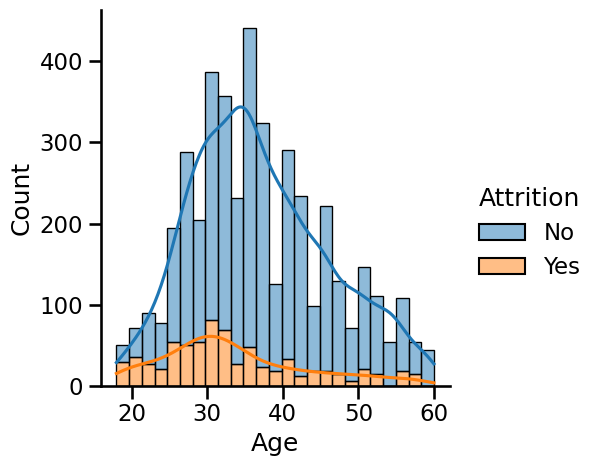

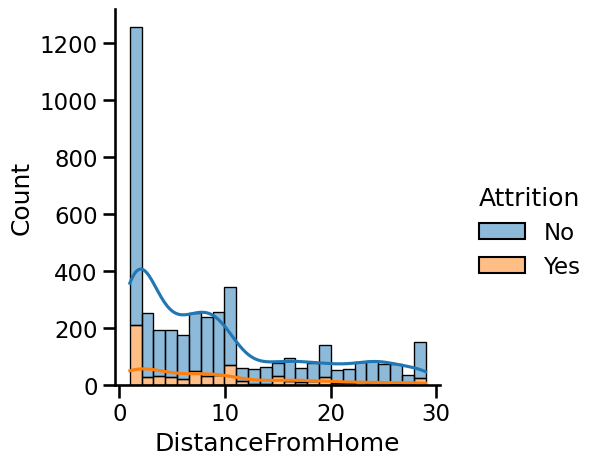

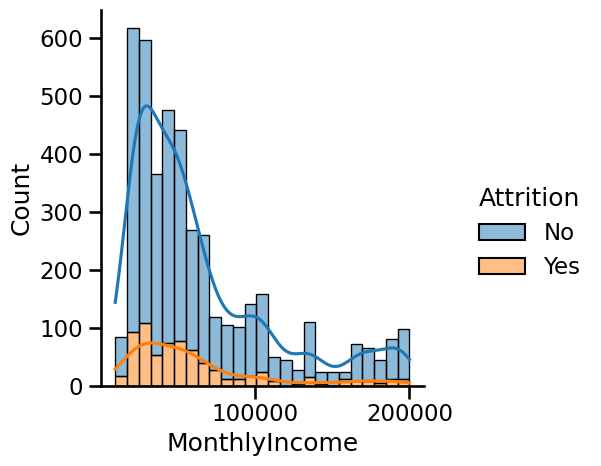

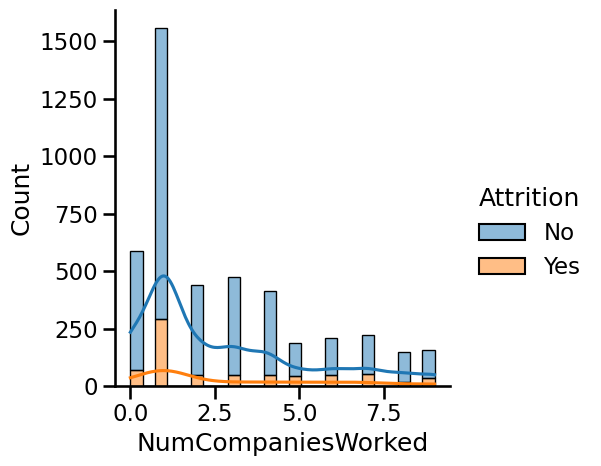

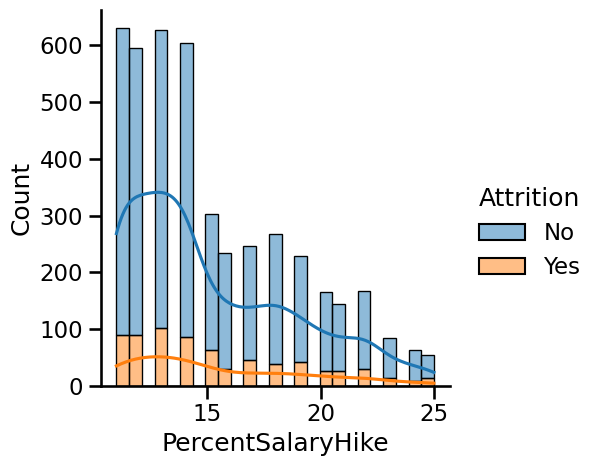

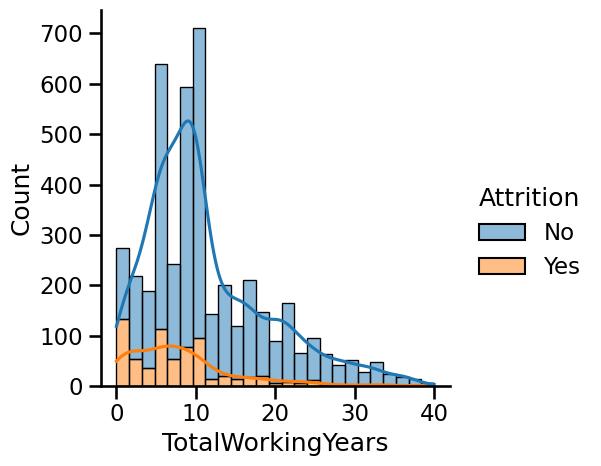

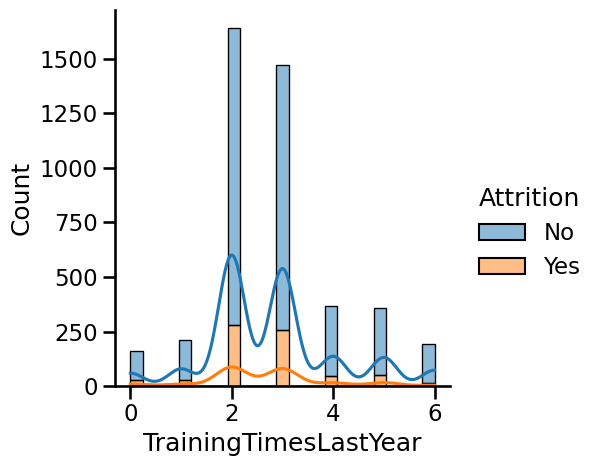

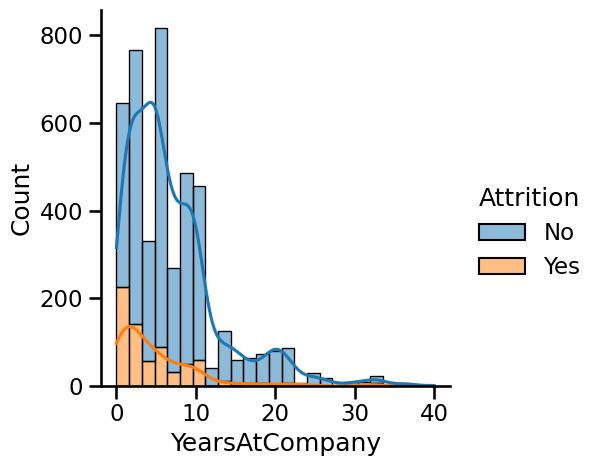

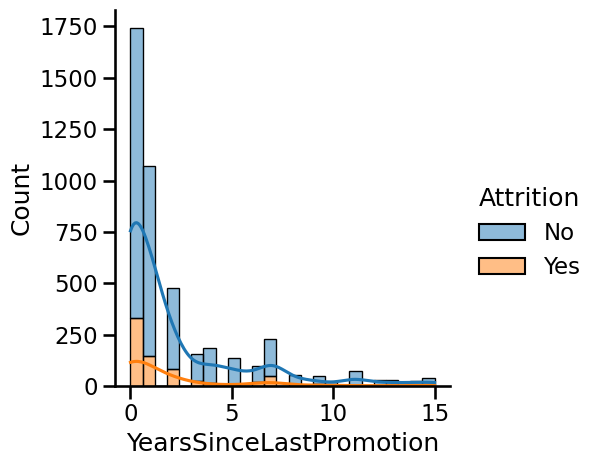

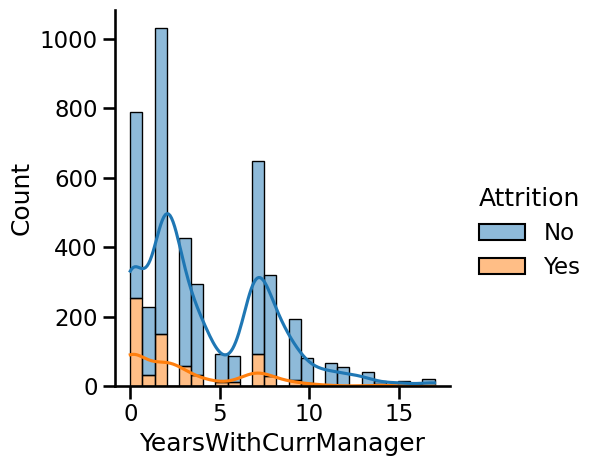

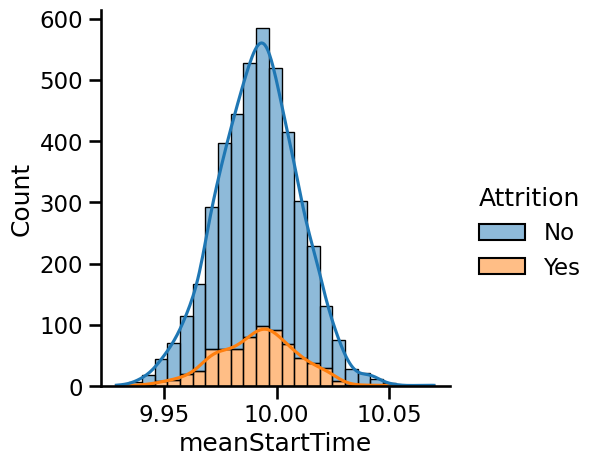

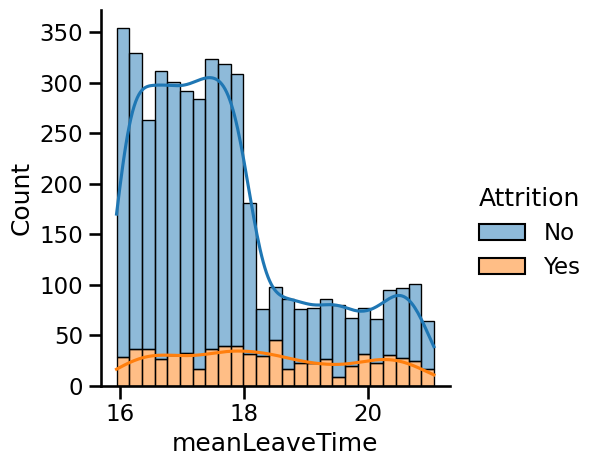

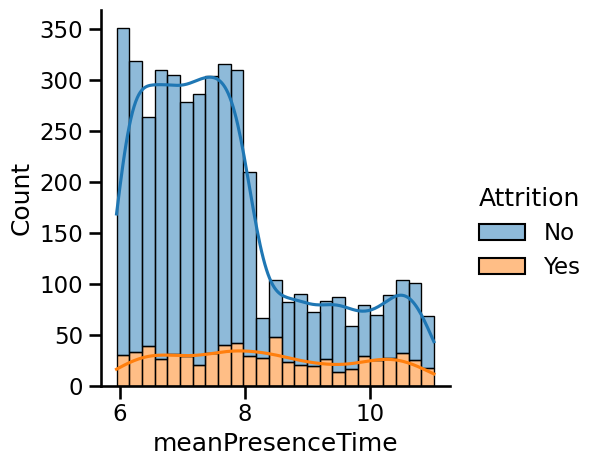

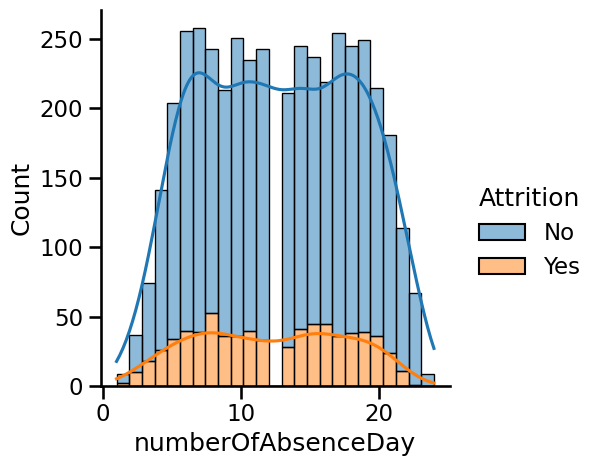

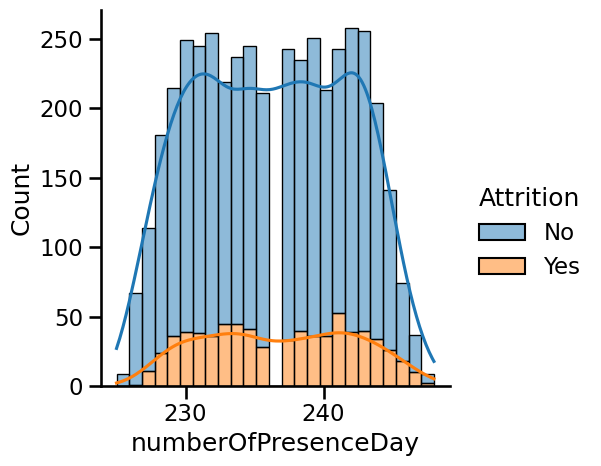

In [71]:
for name in cont:
    sns.displot(data=analysis_df, x=name, hue="Attrition", multiple="stack", kde=True, bins=25)
    plt.show()

###### **Conclusion**:
- *Age*
=> L'entreprise contient majoritairement des jeunes, on remarque visuellement que plus quelqu'un est jeune, plus celui-ci risque de changer d'entreprise.
- *DistanceFromHome*
=> La plupart des personnes vivent proches du lieu de travail, on ne remarque pas de grosse différences en fonction de la distance.
- *MonthlyIncome*
=> On remarque que plus quelqu'un va être payé, moins celui-ci sera avenant à partir de l'entreprise. Il pourrait être intéressant de mettre cette variable en corrélation avec *Education* et *JobLevel*.
- *NumCompaniesWorked*
=> On ne remarque pas de grosses différences entre ceux ayant travaillé dans de nombreuses entreprises et ceux ne changeant que très peu d'entreprise.
- *PercentSalaryHike*
=> La montée en salaire ne semble pas déterminante.
- *TotalWorkingYears*
=> On remarque que les personnes commençant leur carrière sont beaucoup plus propices de partir de l'entreprise. Cela pourrait s'expliquer du fait d'une paye basse (première expérience), ou du fait qu'ils soient dans un domaine qu'ils n'aiment pas. Nous pourrions donc essayer de corréler cela par la suite.
- *TrainingTimesLastYear*
=> La plupart des personnes ont entre 2 et 3 formations par an. Cela ne semble pas affecter l'attrition.
- *YearsAtCompany*
=> Plus quelqu'un restera longtemps dans l'entreprise, moins il aura de risque de turnover. Cela pourrait être mis en relation avec le salaire.
- *YearsSinceLastPromotion*
=> Cela ne semble pas déterminant.
- *YearsWithCurrManager*
=> Cela ne semble pas déterminant.
- *meanStartTime*
=> Cela ne semble pas déterminant.
- *meanLeaveTime*
=> Plus quelqu'un part tard, plus celui-ci aura un haut taux de turnover.
- *meanPresenceTime*
=> Semble déterminant, quelqu'un faisant plus de 8H aura un plus haut taux de turnover.
- *numberOfAbsenceDay*
=> Cela ne semble pas déterminant.
- *numberOfPresenceDay*
=> Cela ne semble pas déterminant.

### Horaires de travail et départements

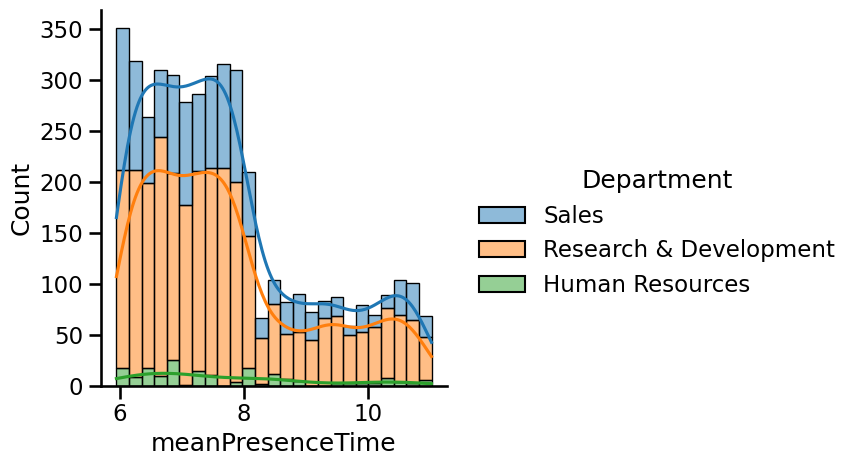

In [72]:
sns.displot(data=analysis_df, x='meanPresenceTime', hue="Department", multiple="stack", kde=True, bins=25)

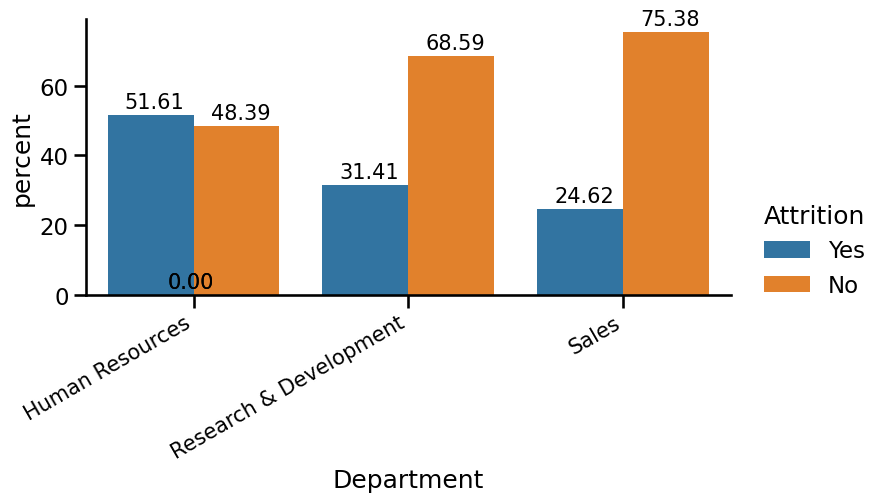

In [73]:
plot_hist("Department", analysis_df[analysis_df["meanPresenceTime"] > 8.1])

On remarque que dans les personnes faisant des heures supplémentaires, nous trouvons surtout des personnes appartenant aux service R&D. De plus le pourçentage de turnover est bien plus grand, peu importe le département, lorsque l'employé travaille plus de 8H en moyenne.


### Matrice de Corrélation

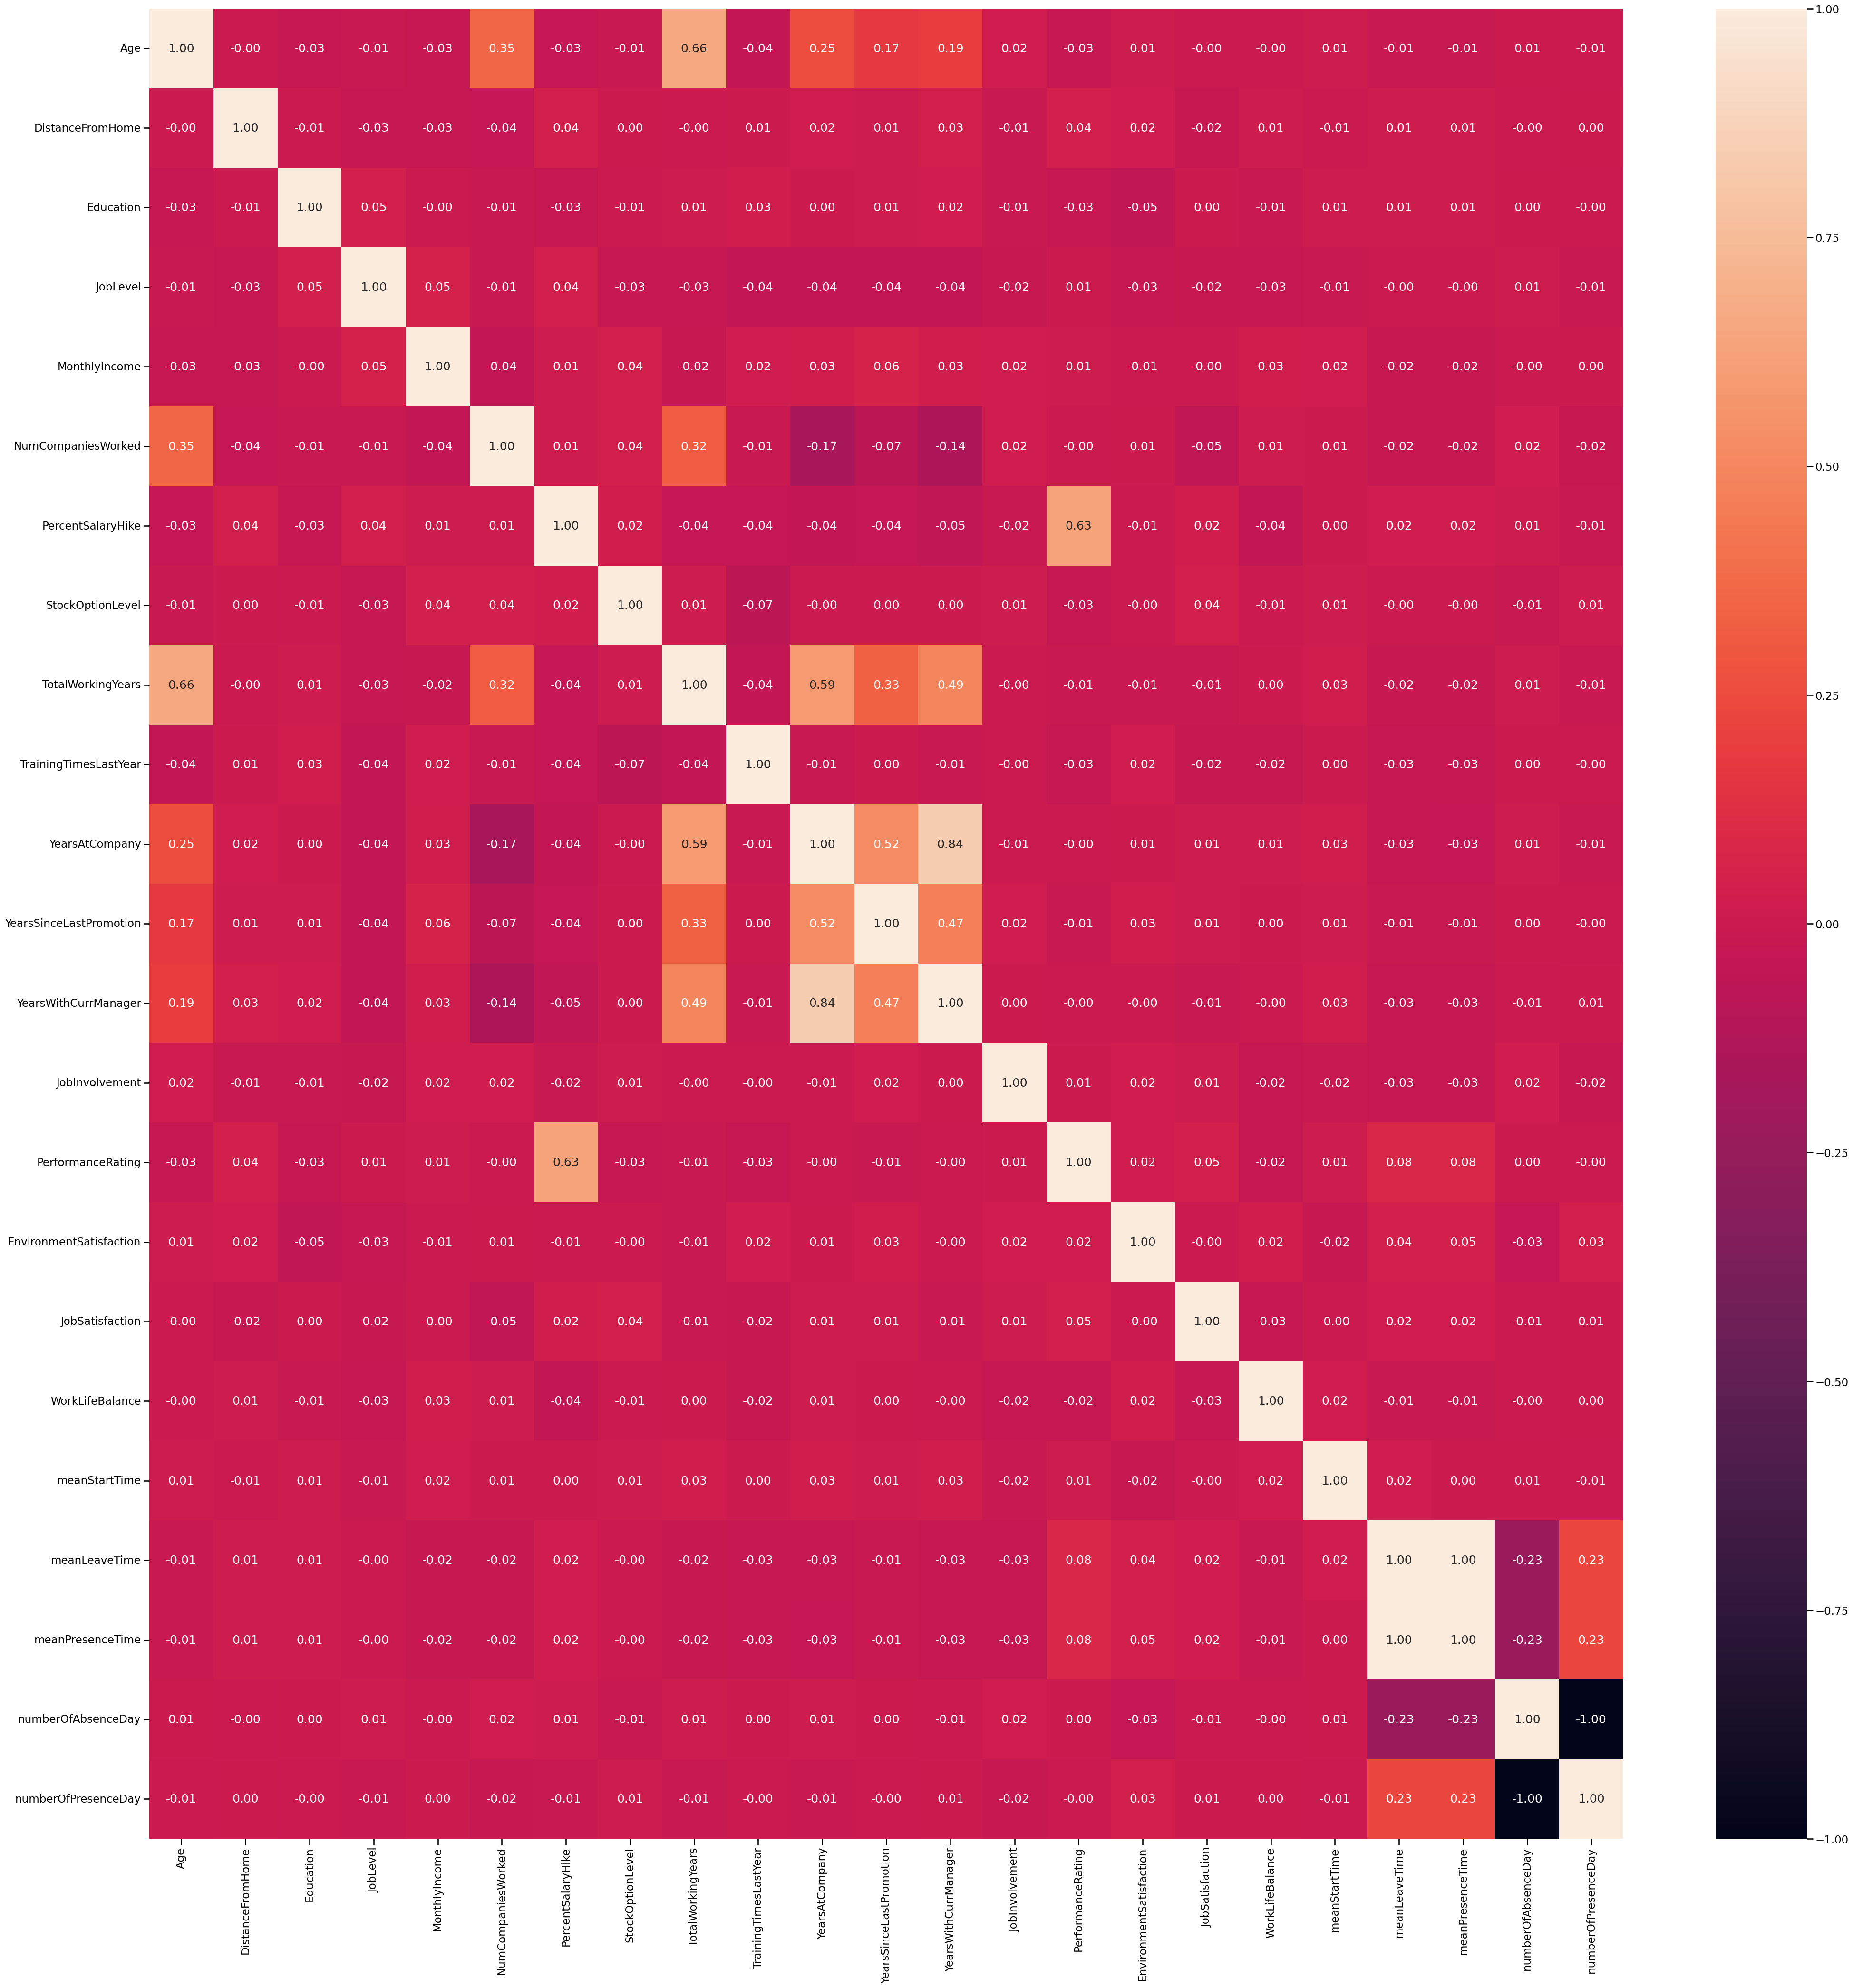

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only the numeric columns for correlation calculation
numeric_df = analysis_df.select_dtypes(include=[np.number])

# Now you can safely compute the correlation matrix and plot it
plt.figure(figsize=(50, 50))
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, fmt=".2f")
plt.show()


**Conclusion**:

La matrice de corrélation montre des corrélations importantes entre toutes les valeurs liées a un nombre d'années: '*YearsWithCurrentManager*', '*YearsSinceLastPromotion*', '*YearsAtCompany*', '*Age*', and '*TotalWorkingYears*'. Quand l'âge monte, les autres vont en général suivre cette tendance. Les variables avec une trop grande corrélation pourront être supprimées par la suite (*numberOfAbscenceDay* ou *numberOfPresenceDay*)

### T-Test
#### Variables continues

In [75]:
from scipy.stats import ttest_ind

turnover_yes_df = analysis_df[analysis_df['Attrition'] == 'Yes']
turnover_no_df = analysis_df[analysis_df['Attrition'] == 'No']

check_df(turnover_yes_df, 'turnover_yes_df')
check_df(turnover_no_df, 'turnover_no_df')

# We shall have almost the same amount of yes and no in both dataframes for the test.
# We randomly pick the same amount of data as turnover_yes_df from turnover_no_df.
balanced_turnover_no_df = turnover_no_df.sample(turnover_yes_df.shape[0])
check_df(balanced_turnover_no_df, 'balanced_turnover_no_df')

Dataframe: turnover_yes_df 
There's 16 (0.1%) NaN field(s) and 0 (0.0%) empty field(s) out of 21314 field(s)
The shape of the dataset is (711, 30)

Dataframe: turnover_no_df 
There's 95 (0.1%) NaN field(s) and 0 (0.0%) empty field(s) out of 110875 field(s)
The shape of the dataset is (3699, 30)

Dataframe: balanced_turnover_no_df 
There's 18 (0.1%) NaN field(s) and 0 (0.0%) empty field(s) out of 21312 field(s)
The shape of the dataset is (711, 30)



In [76]:
def t_test(column):
    alpha = .02
    stat, p = ttest_ind(balanced_turnover_no_df[column].dropna(), turnover_yes_df[column].dropna())

    if p < alpha:
        return 'H0 rejected'
    else:
        return '0'

In [77]:
for col in cont:
    print(f'{col :-<50} {t_test(col)}')

Age----------------------------------------------- H0 rejected
DistanceFromHome---------------------------------- 0
MonthlyIncome------------------------------------- 0
NumCompaniesWorked-------------------------------- 0
PercentSalaryHike--------------------------------- 0
TotalWorkingYears--------------------------------- H0 rejected
TrainingTimesLastYear----------------------------- H0 rejected
YearsAtCompany------------------------------------ H0 rejected
YearsSinceLastPromotion--------------------------- 0
YearsWithCurrManager------------------------------ H0 rejected
meanStartTime------------------------------------- 0
meanLeaveTime------------------------------------- H0 rejected
meanPresenceTime---------------------------------- H0 rejected
numberOfAbsenceDay-------------------------------- 0
numberOfPresenceDay------------------------------- 0


#### Variables discrètes
Afin de réaliser un t-test sur des variables catégorielles il est nécessaire de faire pivoter le dataset en utilisant crosstab.

In [78]:
pd.crosstab(analysis_df['Department'],
                 analysis_df['Attrition'],
                 margins=True, margins_name="Total")

Attrition,No,Yes,Total
Department,,,
Human Resources,132,57,189
Research & Development,2430,453,2883
Sales,1137,201,1338
Total,3699,711,4410


In [79]:
from scipy.stats import chi2

def chi_square(df, column):
    df = df.dropna()

    dc = pd.crosstab(df[column],
                     df['Attrition'],
                     margins=True, margins_name="Total")

    # significance level
    alpha = .02
    # Calculation of Chisquare
    chi_square = 0

    rows = df[column].unique()
    columns = df['Attrition'].unique()
    for i in columns:
        for j in rows:
            O = dc[i][j]
            E = dc[i]['Total'] * dc['Total'][j] / dc['Total']['Total']
            chi_square += (O-E)**2/E

    # The p-value approach
    p = 1 - chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))

    if p < alpha:
        return 'H0 rejected'
    else:
        return '0'

In [80]:
for col in disc:
    result = chi_square(analysis_df, col)
    print(f'{col :-<50} {result}')

EducationField------------------------------------ H0 rejected
BusinessTravel------------------------------------ H0 rejected
Department---------------------------------------- H0 rejected
Education----------------------------------------- 0
JobLevel------------------------------------------ 0
JobRole------------------------------------------- H0 rejected
JobInvolvement------------------------------------ 0
StockOptionLevel---------------------------------- 0
PerformanceRating--------------------------------- 0
EnvironmentSatisfaction--------------------------- H0 rejected
JobSatisfaction----------------------------------- H0 rejected
WorkLifeBalance----------------------------------- H0 rejected
Gender-------------------------------------------- 0
MaritalStatus------------------------------------- H0 rejected


## Preprocessing
### Séparation des données
On va maintenant séparer notre dataset en deux, un servant à l'analyse et l'entrainement, l'autre servant à tester la qualité du modèle

In [81]:
from sklearn.model_selection import train_test_split

# custom encoding
def encoding(series, code):
    return series.map(code)

X = hr_df.copy().drop('Attrition', axis=1)
y = encoding(hr_df['Attrition'], {'Yes': True, 'No': False})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE)

check_df(X_train, 'X_train')
check_df(X_test, 'X_test')

Dataframe: X_train 
There's 90 (0.1%) NaN field(s) and 0 (0.0%) empty field(s) out of 116334 field(s)
The shape of the dataset is (3528, 33)

Dataframe: X_test 
There's 21 (0.1%) NaN field(s) and 0 (0.0%) empty field(s) out of 29085 field(s)
The shape of the dataset is (882, 33)



### Preprocessing Initial
#### Préparation des données

Afin de comprendre et determiner si nos futurs changements seront utiles, nous allons tout d’abord creer un pre-processing basique que nous allons evaluer avec un modele simple (une regression logistique). Il sera ainsi facile de voir les progres effectuer et les differents points d’amelioration.


In [82]:
from sklearn.preprocessing import StandardScaler

# encoding for discrete variables
def encoding_disc(df):
    return pd.get_dummies(df)

# imputation
def imputation(df):
    return df.dropna()

# standardisation
def standardisation(df):
    cont_scaler = StandardScaler()
    return pd.DataFrame(cont_scaler.fit_transform(df))

In [83]:
def preprocessing(df):
    # Imputation
    df = imputation(df)
    # Encoding Attrition
    y_processed = df["Attrition"]
    # Encoding Discrete variables
    discrete_df = encoding_disc(df[disc]).reset_index(drop=True)
    # Standardisation
    continuous_df = standardisation(df[cont]).reset_index(drop=True)
    # concat discrete and continuous variables
    X_processed = pd.concat([discrete_df, continuous_df], axis=1)
    # change columns type to string
    X_processed.columns = X_processed.columns.astype(str)
    check_df(X_processed, "X processed")
    return X_processed, y_processed

In [84]:
X_train_processed, y_train_processed = preprocessing(pd.concat([X_train, y_train], axis=1))

Dataframe: X processed 
There's 0 (0.0%) NaN field(s) and 0 (0.0%) empty field(s) out of 168462 field(s)
The shape of the dataset is (3438, 49)



#### Modélisation basique

In [85]:
from sklearn.linear_model import LogisticRegression

first_model = LogisticRegression(max_iter=500)

#### Procédure d'évaluation

In [86]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve



def evaluation(model, X_eval, y_eval):
    train_sizes, train_scores, val_scores = learning_curve(model, X_eval, y_eval,
                                                           cv=4, scoring='f1',
                                                           train_sizes=np.linspace(0.2, 1, 20))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='train score', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, val_scores.mean(axis=1), label='validation score', linestyle='--', marker='s')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='orange')
    plt.legend([f'Train', f'Validation: {np.mean(val_scores, axis=1).max():.2f}'])

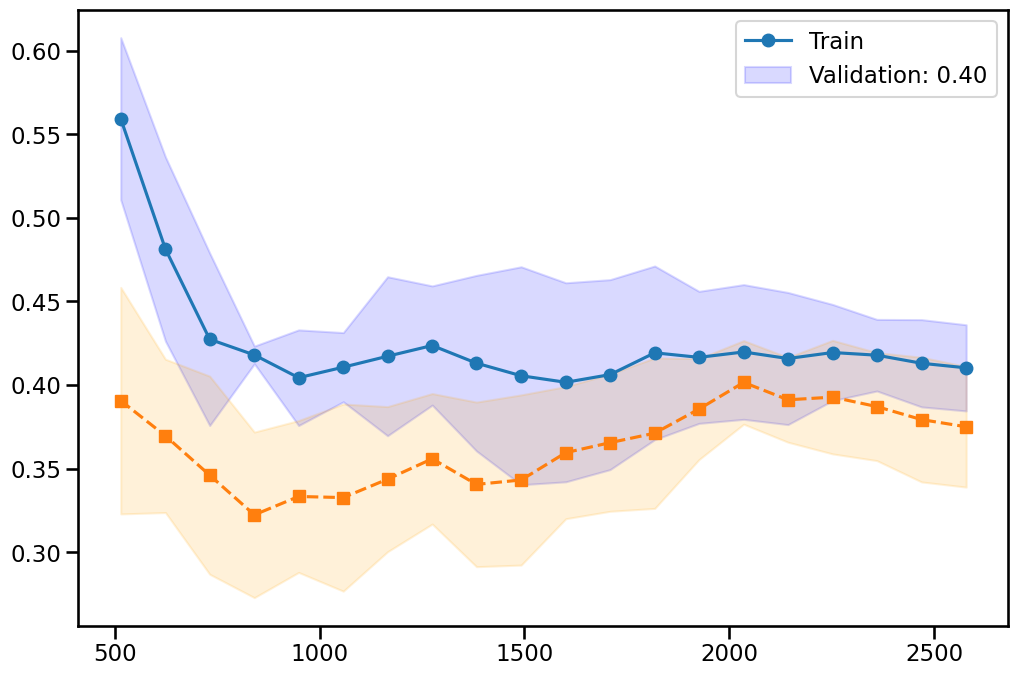

In [87]:
evaluation(first_model, X_train_processed, y_train_processed)

**Conclusion**:

Le modèle est clairement en underfitting, en effet le train score n'arrive pas a monter peu importe la train size et malgré la cross-validation (de meme pour le validation score qui reste tres bas). Nous allons donc essayer de remplacer les valeurs NaN au lieu de les supprimer, sélectionner seulement les variables utiles. Nous pouvons également effectuer du Feature Engineering et utiliser un modèle plus comlexe si cela ne nous convient toujours pas. Utiliser un modele plus performant permettrait de corriger grandement cet underfitting, nous allons donc essayer un DecisionTree en complement de notre feature selection & engineering.

### Amélioration des données
#### Feature Selection
Suite à notre EDA, il est possible de déterminer quelle feature éliminer et quelle feature garder.
Nous allons donc garder:

**discrètes**:
- EducationField
- BusinessTravel
- EnvironmentSatisfaction
- MaritalStatus

**continues**:
- Age
- TotalWorkingYears
- YearsAtCompany
- YearsWithCurrentManager
- meanPresenceTime

#### Feature Engineering
Nous cherchons à créer de nouvelles variables afin d'augmenter la performance de notre modèle. A la suite de nos études nous avons déterminé différentes pistes:

**re-catégoriser des variables existantes:**
- VeryHighEducationAndVeryLowJobLevel
- EducationIs2
- JobLevelIs2
- VeryLowEnvironmentSatisfaction
- VeryLowWorkLifeBalance
- DepartmentIsHumanResources
- JobRoleGrouped: groupe tout sauf Manufacturing Director et Research Director
- EducationFieldGrouped: groupe Life Sciences, Marketing, Medical, Other
- JobSatisfactionGrouped: groupe 2 et 3
- JobInvolvementIs1

**création de nouvelles variables:**
- SingleAndTravelling
- MarriedOnceAndTravelling
- DoOvertime
- IsYoungAndWorkedInManyCompanies
- IsYoungAndTravel

In [88]:
analysis_df["VeryHighEducationAndVeryLowJobLevel"] = (analysis_df['Education'] - analysis_df['JobLevel']) >= 4
analysis_df["EducationIs2"] = analysis_df['Education'] == 2
analysis_df["JobLevelIs2"] = analysis_df['JobLevel'] == 2
analysis_df["JobInvolvementIs1"] = analysis_df['JobInvolvement'] == 1
analysis_df["VeryLowEnvironmentSatisfaction"] = analysis_df['EnvironmentSatisfaction'] <= 1
analysis_df["VeryLowWorkLifeBalance"] = analysis_df['WorkLifeBalance'] <= 1
analysis_df["DepartmentIsHumanResources"] = analysis_df['Department'] == "Human Resources"
analysis_df["JobSatisfactionGrouped"] = encoding(analysis_df["JobSatisfaction"], {1: 1, 2: 2, 3: 2, 4: 3})
analysis_df["EducationFieldGrouped"] = encoding(analysis_df["EducationField"], {
    "Life Sciences": "Other",
    "Human Resources": "Human Resources ",
    "Marketing": "Other",
    "Technical Degree": "Technical Degree",
    "Other": "Other",
    "Medical": "Other"
})

analysis_df["JobRoleGrouped"] = encoding(analysis_df["JobRole"], {
    "Healthcare Representative": "Other",
    "Human Resources": "Other",
    "Manager": "Other",
    "Manufacturing Director": "Manufacturing Director",
    "Research Director": "Research Director",
    "Research Scientist": "Other",
    "Sales Executive": "Other",
    "Sales Representative": "Other"
})

analysis_df["SingleAndTravelling"] = ((analysis_df['MaritalStatus'] == 'Single') & (analysis_df["BusinessTravel"] != "Non-Travel"))
analysis_df["MarriedOnceAndTravelling"] = ((analysis_df['MaritalStatus'] != 'Single') & (analysis_df["BusinessTravel"] != "Non-Travel"))
analysis_df["DoOvertime"] = analysis_df['meanPresenceTime'] > 8
analysis_df["IsYoungAndWorkedInManyCompanies"] = (analysis_df['Age'] <= 35) & (analysis_df['NumCompaniesWorked'] > 3)
analysis_df["IsYoungAndTravel"] = ((analysis_df['Age'] <= 35) & (analysis_df["BusinessTravel"] != "Non-Travel"))



new_columns = ['VeryHighEducationAndVeryLowJobLevel', 'VeryLowEnvironmentSatisfaction', 'VeryLowWorkLifeBalance', 'SingleAndTravelling', 'MarriedOnceAndTravelling', 'DoOvertime', 'IsYoungAndWorkedInManyCompanies', 'IsYoungAndTravel', 'EducationIs2', 'JobLevelIs2', 'DepartmentIsHumanResources', 'JobSatisfactionGrouped', 'EducationFieldGrouped', 'JobRoleGrouped', 'JobInvolvementIs1']

for name in new_columns:
    attrition = pd.crosstab(analysis_df[name],
                            analysis_df['Attrition'],
                            margins=True, margins_name="Total")
    print(f"----- {name} -----")
    print(prediction_intervals(attrition))

----- VeryHighEducationAndVeryLowJobLevel -----
Attrition                            P_Total  P_Yes  Lower  Upper  Predicate  \
VeryHighEducationAndVeryLowJobLevel                                            
False                                  0.988  0.983  0.980  0.996        0.0   
True                                   0.012  0.017  0.004  0.020        0.0   

Attrition                            Difference  
VeryHighEducationAndVeryLowJobLevel              
False                                       NaN  
True                                        NaN  
----- VeryLowEnvironmentSatisfaction -----
Attrition                       P_Total  P_Yes  Lower  Upper  Predicate  \
VeryLowEnvironmentSatisfaction                                            
False                             0.808    0.7  0.779  0.837       -1.0   
True                              0.192    0.3  0.163  0.221        1.0   

Attrition                       Difference  
VeryLowEnvironmentSatisfaction            

Nous pouvons donc garder:
- EducationIs2
- JobLevelIs2
- VeryLowEnvironmentSatisfaction
- VeryLowWorkLifeBalance
- SingleAndTravelling
- MarriedOnceAndTravelling
- DoOvertime
- IsYoungAndWorkedInManyCompanies
- IsYoungAndTravel
- DepartmentIsHumanResources
- JobSatisfactionGrouped
- EducationFieldGrouped
- JobRoleGrouped
- JobInvolvementIs1

En effet VeryHighEducationAndVeryLowJobLevel n’est finalement pas important pour déterminer notre target. Les autres variables semblent utile selon nos intervalles de predictions.

### Préparation des données


Nous avons donc:
**discrètes**:
- EducationField
- BusinessTravel
- EnvironmentSatisfaction
- MaritalStatus

**continues**:
- Age
- TotalWorkingYears
- YearsAtCompany
- YearsWithCurrentManager
- meanPresenceTime

**discrètes à créer**:
- EducationIs2
- JobLevelIs2
- VeryLowEnvironmentSatisfaction
- VeryLowWorkLifeBalance
- SingleAndTravelling
- MarriedOnceAndTravelling
- DoOvertime
- IsYoungAndWorkedInManyCompanies
- IsYoungAndTravel
- DepartmentIsHumanResources
- JobSatisfactionGrouped
- EducationFieldGrouped
- JobRoleGrouped
- JobInvolvementIs1


#### Pre-Processing Pipeline

Notre pre-processing pipeline contiendra trois petites Pipeline:
- **cont_pipeline**: Pipeline destinee aux variables continues
    - imputer: KNNImputer
    - scaler: RobustScaler
- **disc_pipeline**: Pipeline destinee aux variables discretes
    - encoder: OneHotEncoder
- **feat_eng_pipeline**: Pipeline destinee au feature engineering
    - CombinedAttributesAdder
    - OneHotEncoder

##### CombinedAttributesAdder
Nous allons creer un CombinedAttributesAdder afin de gerer la partie Feature Engineering et d'ajouter de maniere automatiser toutes les nouvelles features definies plus haut.

In [89]:
# encoding for EducationFieldGrouped
efg_code = {
    "Life Sciences": "Other",
    "Human Resources": "Human Resources ",
    "Marketing": "Other",
    "Technical Degree": "Technical Degree",
    "Other": "Other",
    "Medical": "Other"
}

# encoding for JobRoleGrouped
jrg_code = {
    "Healthcare Representative": "Other",
    "Laboratory Technician": "Other",
    "Human Resources": "Other",
    "Manager": "Other",
    "Manufacturing Director": "Manufacturing Director",
    "Research Director": "Research Director",
    "Research Scientist": "Other",
    "Sales Executive": "Other",
    "Sales Representative": "Other"
}

In [90]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom encoding for np_array
def encoding_nparray(series, code):
    temp = pd.Series(series)
    return temp.map(code).values

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):

        education_is_2 = X['Education'] == 2
        job_level_is_2 = X['JobLevel'] == 2
        job_involvement_is_1 = X['JobInvolvement'] == 1
        environment_satisfaction_is_1 = X['EnvironmentSatisfaction'] == 1
        work_life_balance_is_1 = X['WorkLifeBalance'] == 1
        department_is_hr = X['Department'] == "Human Resources"
        job_satisfaction_grouped = encoding_nparray(X["JobSatisfaction"], {1: 1, 2: 2, 3: 2, 4: 3})
        education_field_grouped = encoding_nparray(X["EducationField"], efg_code)
        job_role_grouped = encoding_nparray(X["JobRole"], jrg_code)
        single_and_travelling = ((X['MaritalStatus'] == 'Single') & (X["BusinessTravel"] != "Non-Travel"))
        married_once_and_travelling = ((X['MaritalStatus'] != 'Single') & (X["BusinessTravel"] != "Non-Travel"))
        do_overtime = X['meanPresenceTime'] > 8
        is_young_and_worked_in_many_companies = (X['Age'] <= 35) & (X['NumCompaniesWorked'] > 3)
        is_young_and_travel = ((X['Age'] <= 35) & (X["BusinessTravel"] != "Non-Travel"))


        return np.c_[
            education_is_2,
            job_level_is_2,
            job_involvement_is_1,
            environment_satisfaction_is_1,
            work_life_balance_is_1,
            department_is_hr,
            job_satisfaction_grouped,
            education_field_grouped,
            job_role_grouped,
            single_and_travelling,
            married_once_and_travelling,
            do_overtime,
            is_young_and_worked_in_many_companies,
            is_young_and_travel,
        ]


#### Creation de la Pipeline

In [91]:
from sklearn.impute import  KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline

X = hr_df.copy().drop('Attrition', axis=1)
y = encoding(hr_df["Attrition"], {'Yes': True, 'No': False})

disc_attribs = ["EducationField", "BusinessTravel", "EnvironmentSatisfaction", "MaritalStatus"]
cont_attribs = ["Age", "TotalWorkingYears", "YearsAtCompany", "YearsWithCurrManager", "meanPresenceTime"]
feat_eng_attribs = X.columns.to_list()

disc_pipeline = Pipeline([
    ('encoder', OneHotEncoder()),
])

cont_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=4)),
    ('robust_scaler', RobustScaler()),
])

feat_eng_pipeline = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('encoder', OneHotEncoder()),
])

preprocessing_pipeline = ColumnTransformer([
    ("cont", cont_pipeline, cont_attribs),
    ("dist", disc_pipeline, disc_attribs),
    ("feat_eng", feat_eng_pipeline, feat_eng_attribs),
])

#### Nouveau modèle

Nous allons donc utiliser un DecisionTreeClassifier, celui-ci est plus puissant qu’une regression logistique mais reste un modele relativement simple (en comparaison d’un random forest).

Il nous permettra de voir si notre travail a porte ses fruits.

In [92]:
from sklearn.tree import DecisionTreeClassifier

second_model = DecisionTreeClassifier()

#### Evaluation de notre pré-processing

In [93]:
# get transformed data
X_train_pipeline_processed = preprocessing_pipeline.fit_transform(X_train)

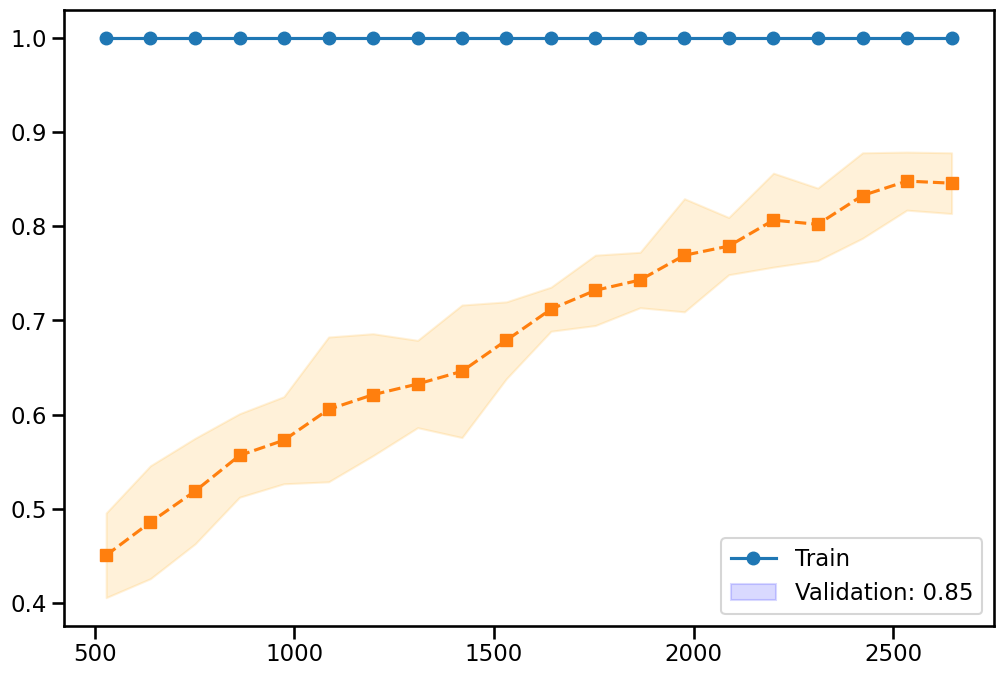

In [94]:
evaluation(second_model, X_train_pipeline_processed, y_train)

**Conclusion**:

C’est tres encourageant, notre modele a reussi a bien comprendre notre jeu de train (parfaitement le comprendre), et appliquer la logique sur le jeu de validation. plus le nombre de donnees augmente, plus notre modele est performant. Nous pouvons maintenant passer a la phase de Modelisation et, afin d’avoir de meillleurs resultats, utiliser des modeles plus performants.

## Modélisation
Nous allons tester différents modèles pour voir lequel s'en sort le mieux sur nos données et l'intégrer à notre Pipeline.

In [95]:
from sklearn.model_selection import cross_val_score

def models_evaluation(models, X_train, y_train):
    for name in models:
        scores = cross_val_score(models[name], X_train, y_train, cv=5, scoring="f1")
        print(f"{name}: {scores.mean()}")

In [96]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

model_1 = DecisionTreeClassifier()
model_2 = LogisticRegression(max_iter=500)
model_3 = RandomForestClassifier()
model_4 = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model_5 = SVC()

models = {
    "DecisionTree": model_1,
    "LogisticRegression": model_2,
    "RandomForest": model_3,
    "XGBoost": model_4,
    "SVC": model_5
}

models_evaluation(models, X_train_pipeline_processed, y_train)

DecisionTree: 0.8691429082493725
LogisticRegression: 0.4217419262807229
RandomForest: 0.9281591538964626
XGBoost: 0.9215112094163486
SVC: 0.4845728928034103


Nous avons donc deux modèles très performants: RandomForest et XGBoost. Le modele RandomForest semble legerement meilleur, nous allons donc tester celui-ci dans un premier temps, s'il n'est pas convaincant nous pourrons essayer XGBoost.

### Preparation du RandomizedSearchCV
Nous allons utiliser un RandomizedSearchCV afin de trouver de bons hyperparametres. Celui-ci sera inclu dans la Pipeline et permettra de modifier le tuner le modele a chaque fois que nous allons fit un nouveau jeu de donnees.

In [97]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

rfc_param_distribs = {
    'n_estimators': randint(low=400, high=500),
    'max_depth': randint(low=40, high=100),
}

rfc = RandomForestClassifier(random_state=42)
rfc_clf = RandomizedSearchCV(rfc, rfc_param_distribs, random_state=42, n_iter=15, scoring='f1')

## Pipeline finale
La pipeline finale, incluant le preprocessor et le classifier.

In [98]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('classifier', rfc_clf)
])

In [99]:
full_pipeline.fit(X_train, y_train)
print("Pipeline fitted!")

Pipeline fitted!


### Evaluation

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import pandas as pd

def predict_and_evaluation_report(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Plotting confusion matrix using the new API
    plt.figure()
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='terrain')
    plt.show()

    # Generating and plotting classification report
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap='terrain')


<Figure size 640x480 with 0 Axes>

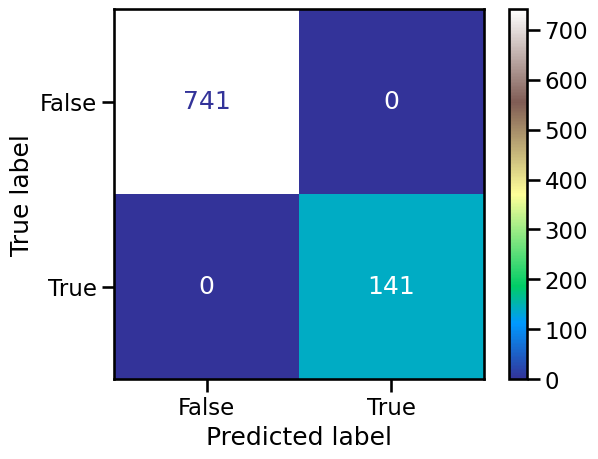

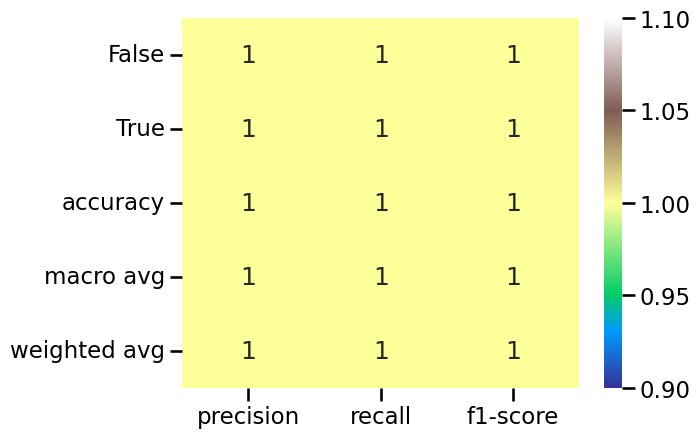

In [101]:
predict_and_evaluation_report(full_pipeline, X_test, y_test)

**Conclusion**:

Apparemment notre modele est parfait!

### Save Pipeline
Nous allons maintenant sauvegarder la Pipeline afin de la reutiliser facilement.

In [102]:
import joblib

joblib.dump(full_pipeline,"project_full_pipeline.pkl")

['project_full_pipeline.pkl']

## Conclusion

### Modèle

Nous obtenons donc un modèle "parfait" (Sûrement à cause des données qui doivent avoir été créées à la main). Ce modèle nosu permet de prévpir si un emplyé va partir de l'entreprise ou non, toutefois celui-ci ne doit pas être utilisé dans un but de recrutement mais plutôt à but informatif. Le modèle permettra de déterminer des employés susceptibles de partir afin de leur proposer des nouvelles opportunités au sein de l'entreprise avant que ceux-ci ne partent.

En effet notre étude nous a perrmis d'établir différentes conclusions.
- On remarque tout d'abord que les jeunes personnes (en âge et années dans l'enteprise) sont plus susceptibles de partir, il serait intéressant de renforcer le process d'enboarding
- Egalement, le fait de voyager dans le cadre du travail compte beaucoup, il serait bien de permettre aux employés de facilement effectuer une mobilité horizontale afin de se retrouver à un post qui leur convient mieux dans ce cas.
- Concernant les services, nous avons remarqué un taux anormalement haut au niveau des ressources humaines, il faudrait prévoir une analyse plus en profondeur de ce service pour voir ce qu'il s'y passe exactement et résoudre le problème.
- Un des principaux points sur lesquels travailler est également le temps supplémentaires, les employés travaillant plus que le temps prévu dans leur contrat sont plus sujet à un départ.